Import libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

TASK 1

3 images of the TASK1


In [2]:
img_gray1=cv2.imread("C0_000001.png")
img_gray2=cv2.imread("C0_000002.png")
img_gray3=cv2.imread("C0_000003.png")

The function mask_segmentation is made in order to create the mask of the image through segmentation. 
The image is processed by a gaussian filter, in order to smoothing the image, and get image with less false positive and false negative of foreground or background objects.
The image smoothed is then processed by a grabCut function that compute the segmentation of the image, and returns a mask.
During the execution of the function, are printed also the images. 

img0


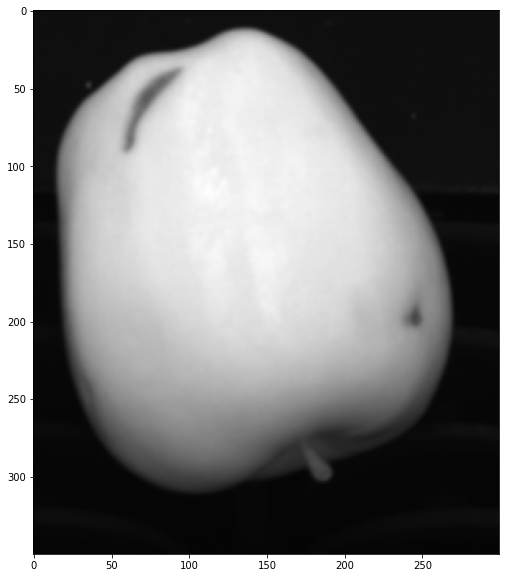

img1


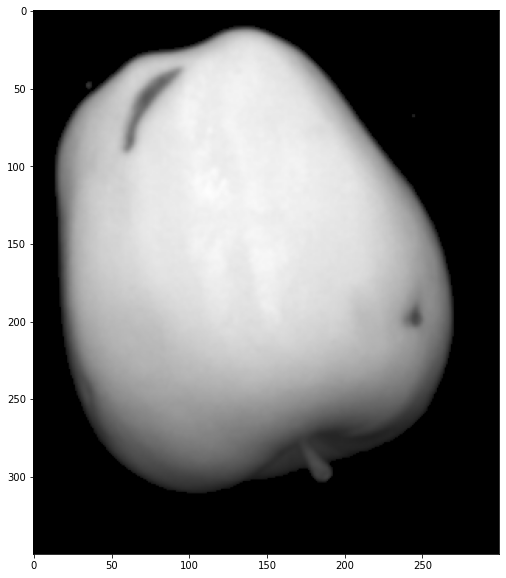

mask_2


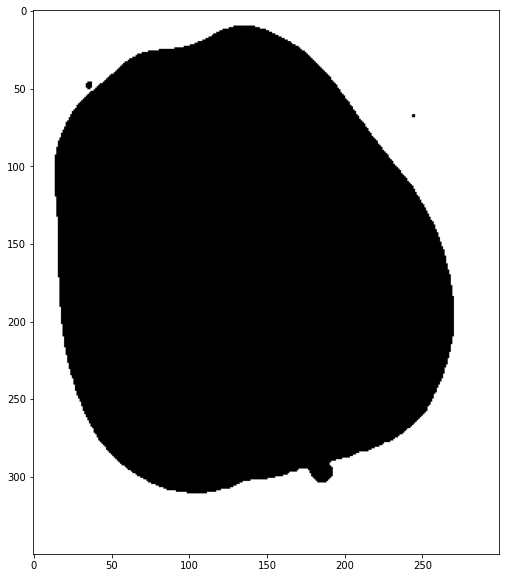

application of the mask


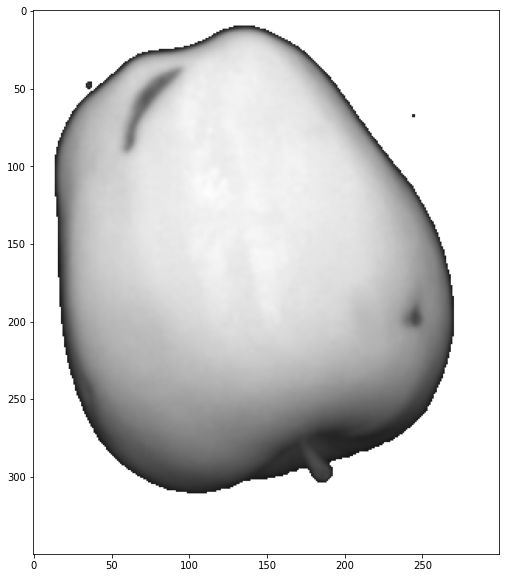

img0


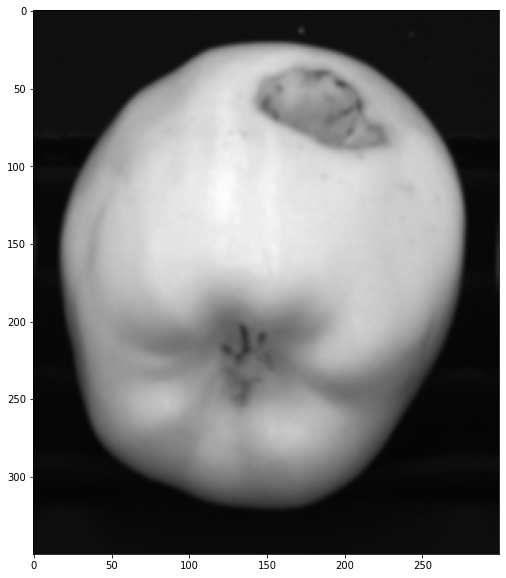

img1


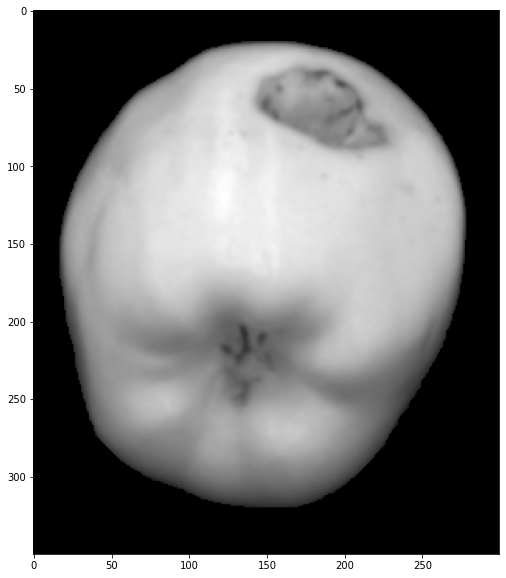

mask_2


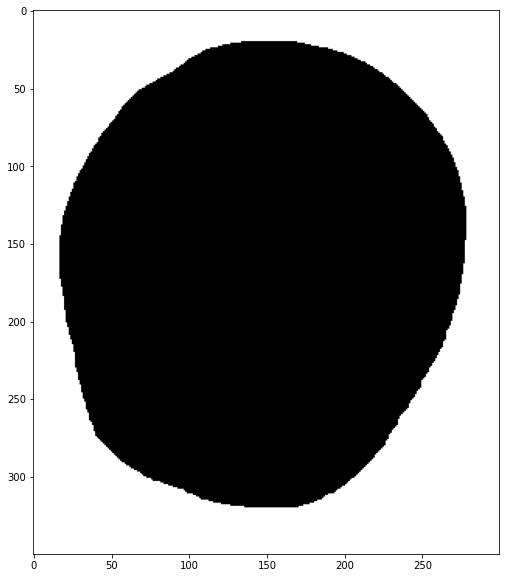

application of the mask


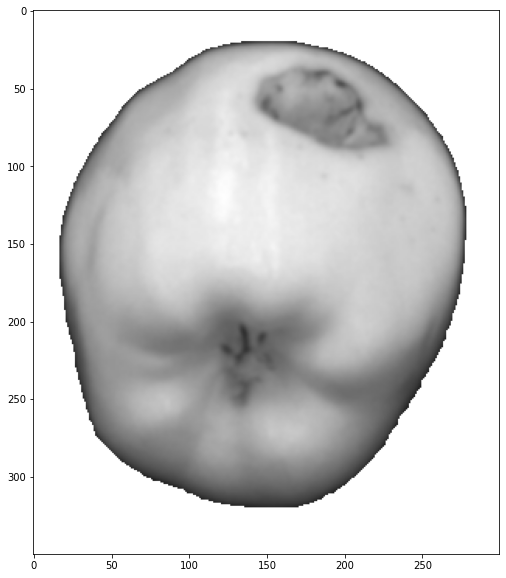

img0


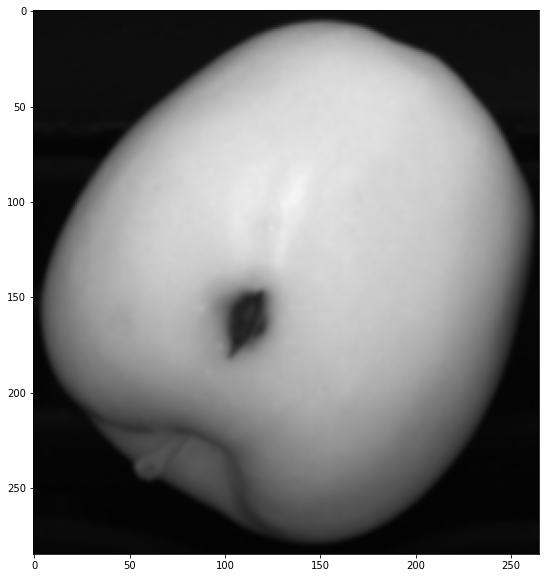

img1


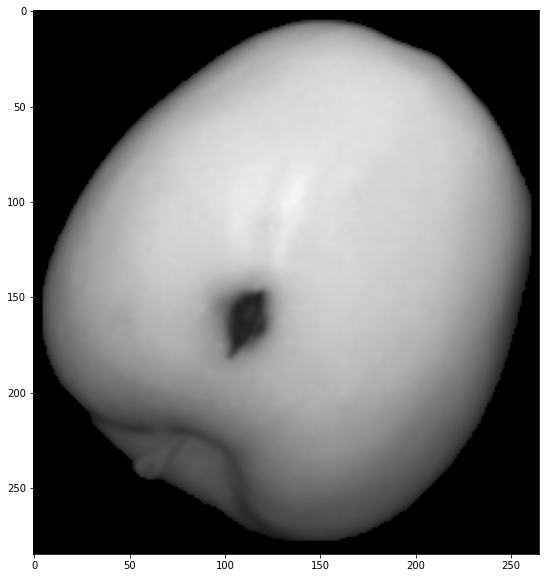

mask_2


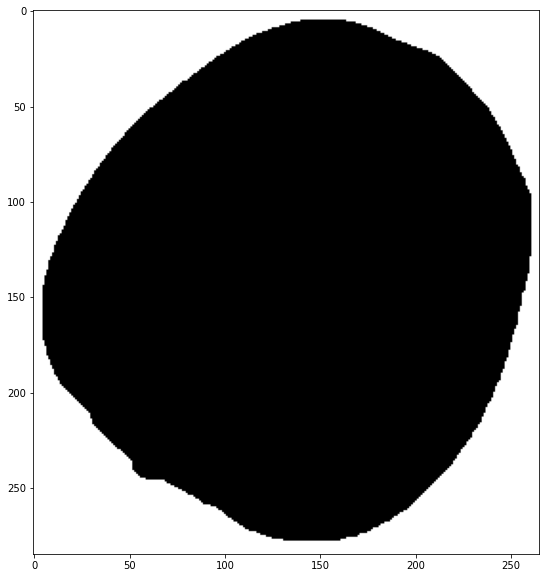

application of the mask


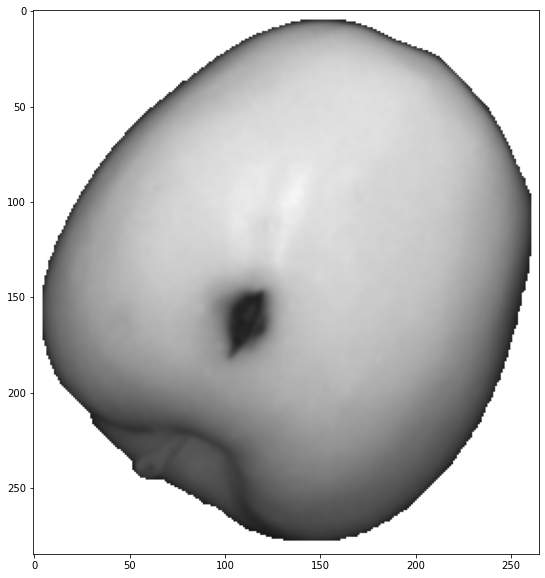

In [3]:




def mask_segmentation(img_gray):
    """
    
        arg: 
            the argument of input is a grayscale image, where is present a fruit in foreground.

        outputs:
            the mask of the image given in input
            the image segmented with background white

    """
    
    #blurring image gray
    imgo = cv2.GaussianBlur(img_gray, (5,5),0)


    ################################################################### VARIABLES FOR THE grabCut
    height, width = imgo.shape[:2]
    
    #Create a mask holder
    mask = np.zeros(imgo.shape[:2],np.uint8)

    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    # Coding the Rect The object must lie within this rect.
    rect = (5,5,width-5,height-5)
    ###################################################################
    cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
    



    #mask is returned by the grabCut and it is modified in order to get a binary mask and compatible by setting type uint8
    #this mask has background black, it is not useful at all, due of the foreground object, that could contain some shapes of black.

    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    #img1 is the product of the blurred image by the mask created
    img1 = imgo*mask[:,:,np.newaxis]


    #plot of the img blurred
    print('img0')
    plt.figure(figsize=(20,10))
    plt.imshow(imgo)
    plt.show()
    # plot of the image multiplied by the mask -> img1
    print('img1')
    plt.figure(figsize=(20,10))
    plt.imshow(img1)
    plt.show()

    #the mask_2  is computed by the substraction of the start grayscale image and the image masked ( with black background), this mask has white as foreground, so it is most useful, because it makes easier to do more elaboration on the foreground of the images.
    mask_2 = imgo - img1

    #Change all pixels in the mask_2 that are not black to white
    mask_2[np.where((mask_2 > [0,0,0]).all(axis = 2))] = [255,255,255] #removing background in the mask

    #Plot mask_2
    print('mask_2')
    plt.figure(figsize=(20,10))
    plt.imshow(mask_2)
    plt.show()

    #Add the background to the image masked (img1)
    final = mask_2+img1

    #plot final image (image where backgroud is supposed to be white)
    print('application of the mask')
    plt.figure(figsize=(20,10))
    plt.imshow(final,cmap="gray")
    plt.show()

    
    return mask_2,final

mask_1,segmented_1=mask_segmentation(img_gray1)
mask_2,segmented_2=mask_segmentation(img_gray2)
mask_3,segmented_3=mask_segmentation(img_gray3)


img1 foreground


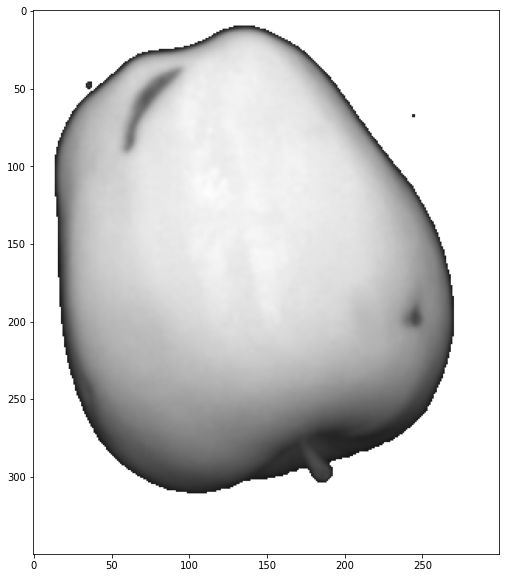

img2 foreground


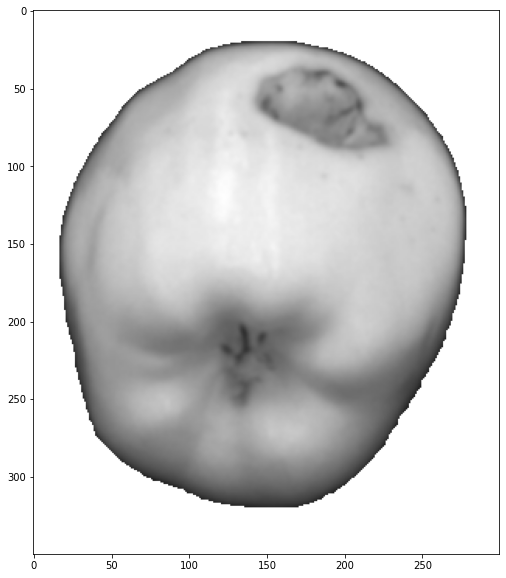

img3 forground


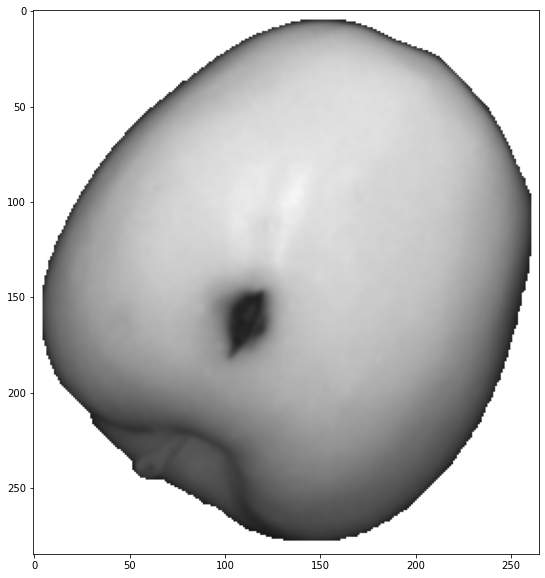

In [4]:


print('img1 foreground')
plt.figure(figsize=(20,10))
plt.imshow(segmented_1)
plt.show()

print('img2 foreground')
plt.figure(figsize=(20,10))
plt.imshow(segmented_2)
plt.show()

print('img3 forground')
plt.figure(figsize=(20,10))
plt.imshow(segmented_3)
plt.show()


The function detect_defects takes as input the segmented images, and applies the gaussian filter to make them smoother. To smoothed images is subsequenty applied the floodfill approach  which allows to determine a bounded area connected to a given node in the image. Consequently, the defects will not be filled. The defects are then represented by a mask, where the areas of the foregrounded object is black just as the defects, wheareas the rest of the pixels are white. The absolute value of the subtraction between the result of the floodfill and the mask given by the function mask_segmentation, is then computed a binary image, where the black is made by the contour pixels and the defects in the foreground of the image. The contours are deleted by the image lastly obtained and the mask of segmentation previously obtained. The result will be the mask to the defects. By using the canny algorithm are then obtained the contours and using the euler number are obtained the number of the defects, and circle them on the initial image (the image provided by the task).

Floodfill is used to fill the object and keep the border of the object not filled in order to get using the next elaborations the border of the fruit and the defects.

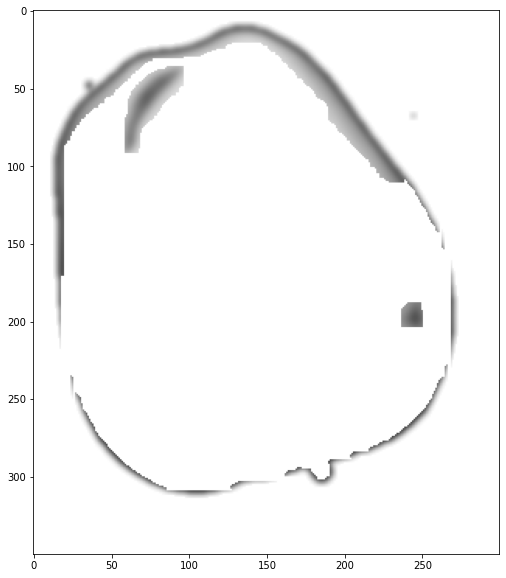

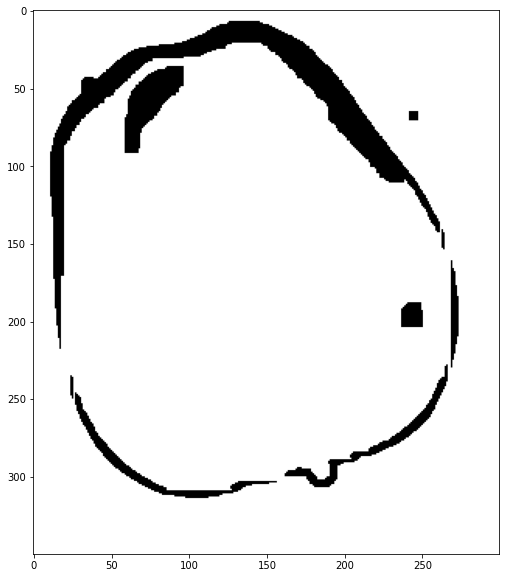

img_2 , the binary mask where the black areas are the background and eventually the defects


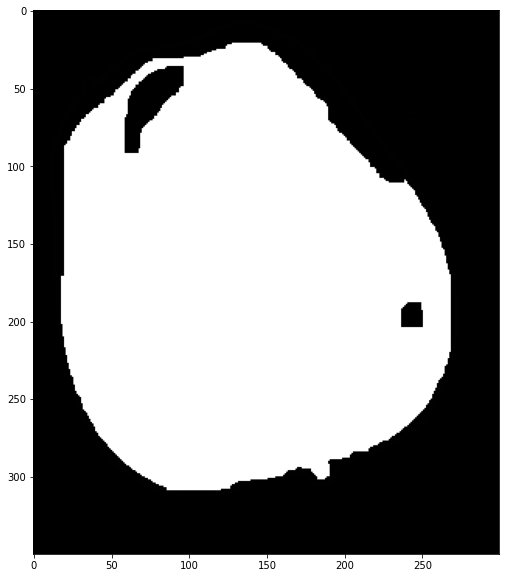

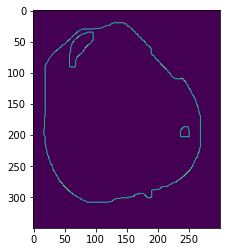

Number of defects are: 2


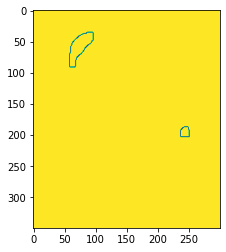

contours


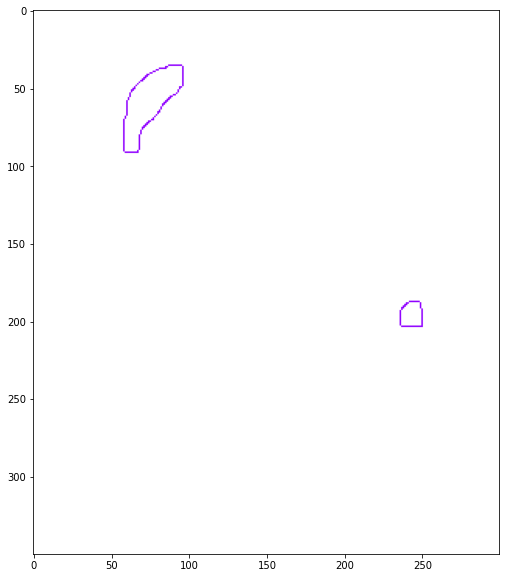

the fruit with the defects detected


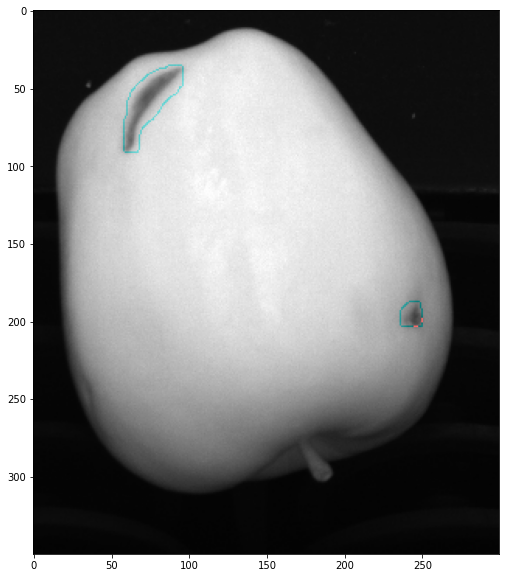

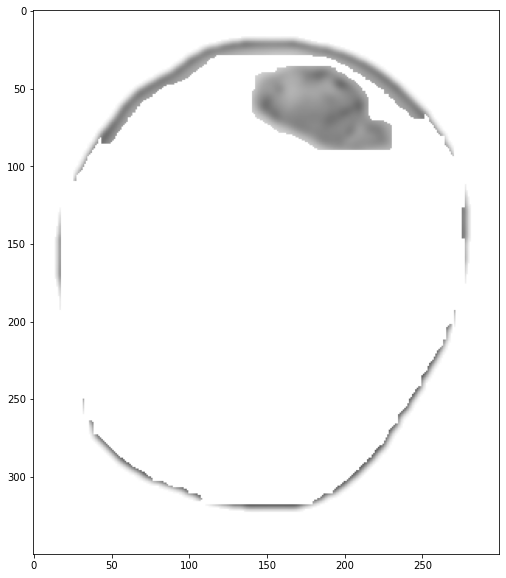

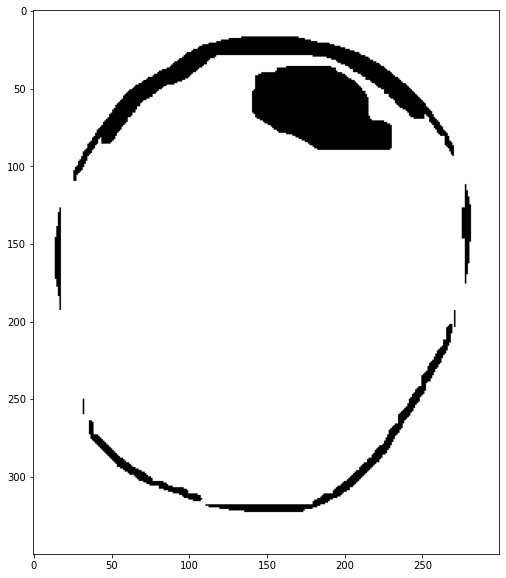

img_2 , the binary mask where the black areas are the background and eventually the defects


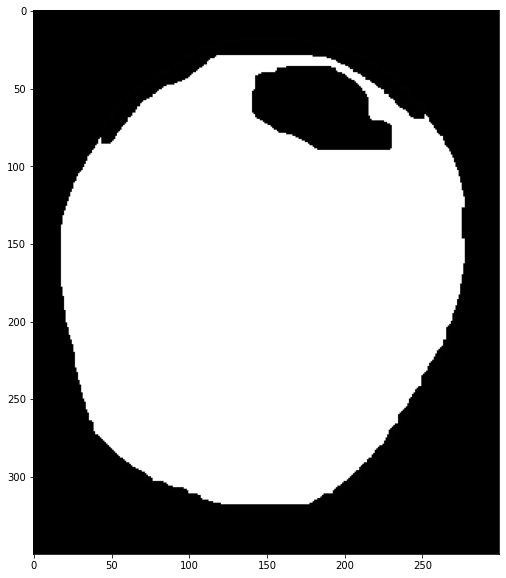

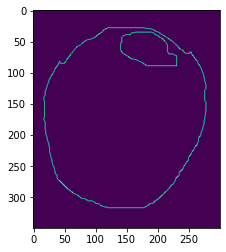

Number of defects are: 1


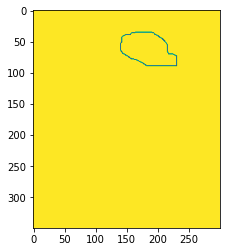

contours


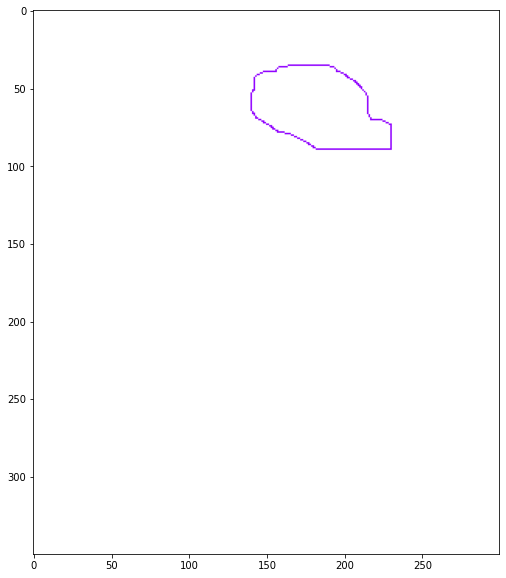

the fruit with the defects detected


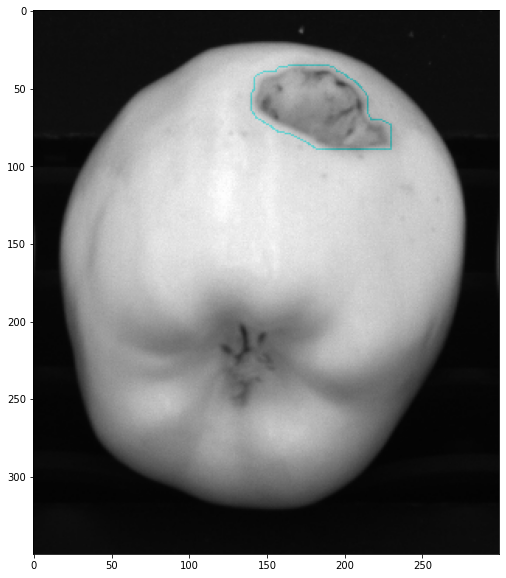

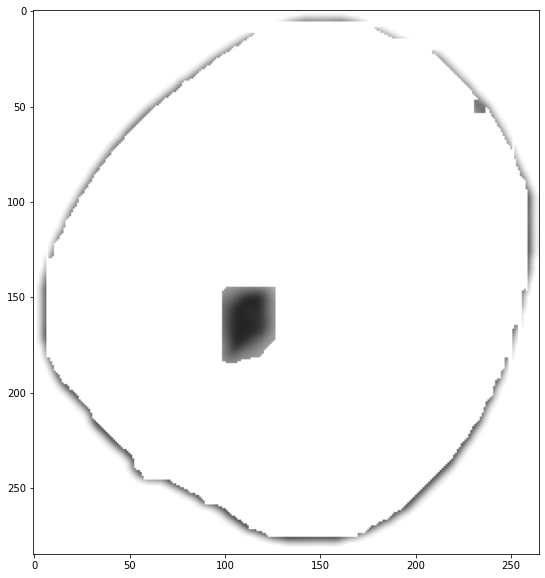

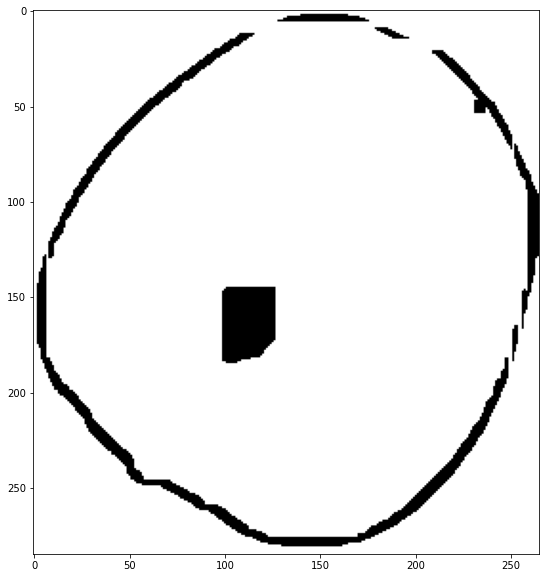

img_2 , the binary mask where the black areas are the background and eventually the defects


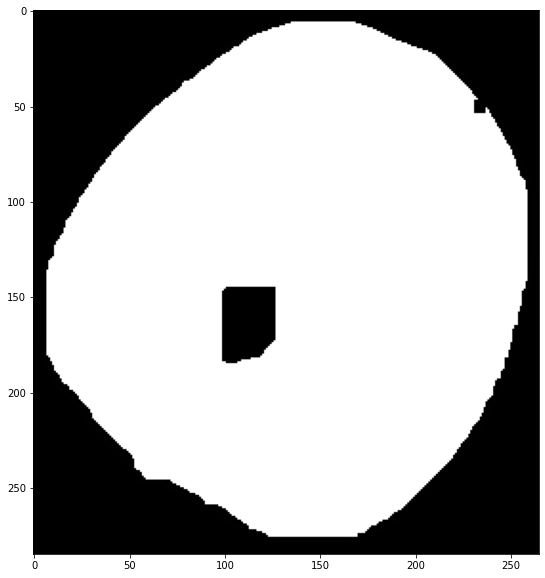

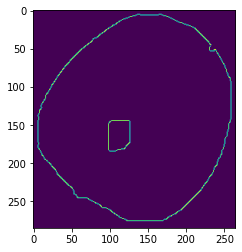

Number of defects are: 1


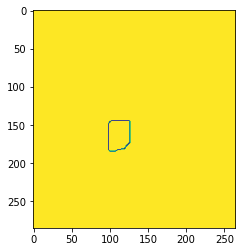

contours


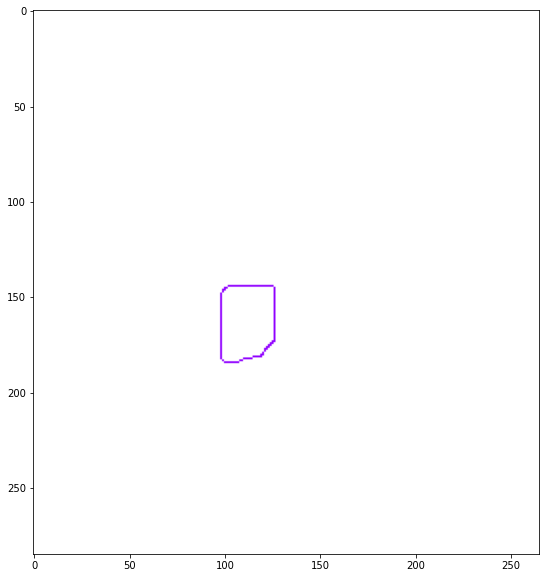

the fruit with the defects detected


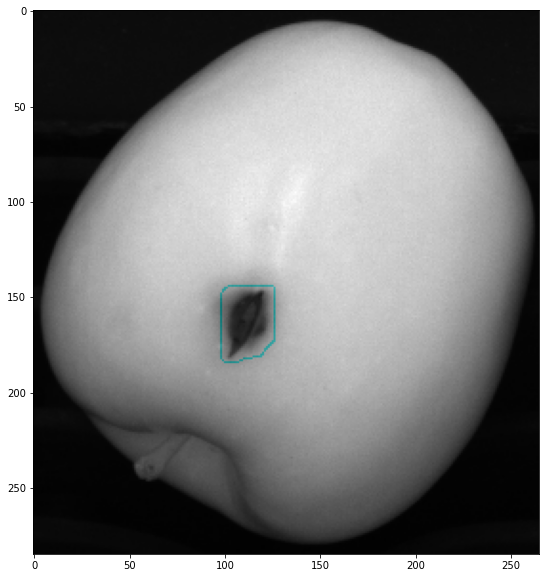

In [5]:
def detect_defects(img,background,img_gray):
    """
        args:
            img : is the image segmented
            background : mask of foreground
            img_gray: starter image
        output:
            img : return image with defects circle    
    """
    #blurring image segmented
    img = cv2.GaussianBlur(img, (11,11),0)

    #parameter of floodfill
    seed=(int(img.shape[0]/2),int(img.shape[1]/2))
    img=cv2.floodFill(img,None,seedPoint=seed, newVal=(255,255,255),loDiff=(2,2,2), upDiff=(12,12,12))[1]


    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

    #mask of contours
    img[np.where((img < [255,255,255]).all(axis = 2))] = [0,0,0]

    plt.figure(figsize=(20,10))

    plt.imshow(img)
    plt.show()

    #img_2 is the binary mask where the black areas are the background and eventually the defects
    print('img_2 , the binary mask where the black areas are the background and eventually the defects')
    img_2=abs(img-background)
    plt.figure(figsize=(20,10))

    plt.imshow(img_2)
    plt.show()

    background_bin=cv2.cvtColor(background,cv2.COLOR_BGR2GRAY)
    background_bin=255-background_bin
    img_2_bin=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
    img_mod= cv2.bitwise_and(background_bin,src2=0,mask=img_2_bin)
    #img_2_bin=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY) # it can be commented
    #background_bin=cv2.cvtColor(background,cv2.COLOR_BGR2GRAY) # it can be commented

    # Searching for the countours in the binary mask created, in order to get the border of the image, but also the insider border, that are defects.


    edged = cv2.Canny(img_2_bin, 30, 200)
    contours, hierarchy = cv2.findContours(edged, 
        cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    plt.imshow(edged) 
    plt.show()
    holes_number=len(contours[::2])-1
    print('Number of defects are:', holes_number)


    img_sign=cv2.drawContours(edged, contours[len(contours)-1], -1, (0,255,0), 3)

    plt.imshow(255-img_sign) 
    plt.show()
    img_lines=255-img_sign

    #making the lines an image
    img_lines.shape

    img_lines = np.stack((img_lines,)*3, axis=-1)


    img_lines[np.where((img_lines > [0,0,0]).all(axis = 2))] = [255,255,255] #removing background
    img_lines[np.where((img_lines==[0,0,0]).all(axis=2))]=[144,0,255]
    #background
    print('contours')
    plt.figure(figsize=(20,10))
    plt.imshow(img_lines)
    plt.show()
    final_test=0
    #Add the background and the image
    final_1 = abs(img_gray+img_lines)

    print('the fruit with the defects detected')
    plt.figure(figsize=(20,10))
    plt.imshow(final_1,cmap="gray")
    plt.show()
    return final_1,holes_number

final1_task1,holes1_task1=detect_defects(segmented_1,mask_1,img_gray1)
final2_task1,holes2_task1=detect_defects(segmented_2,mask_2,img_gray2)
final3_task1,holes3_task1=detect_defects(segmented_3,mask_3,img_gray3)

Plot of the results obtained.

The fruit has  2  defects


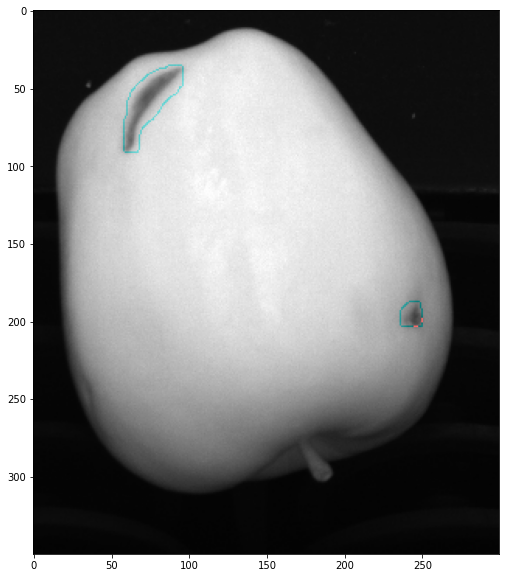

The fruit 2 has  1  defects


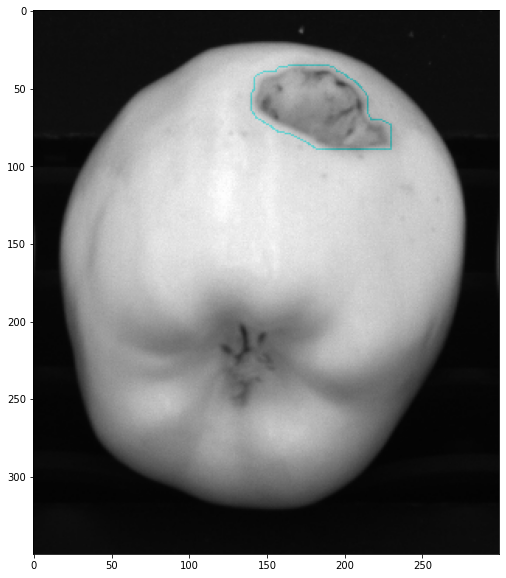

The fruit 3 has  1  defects


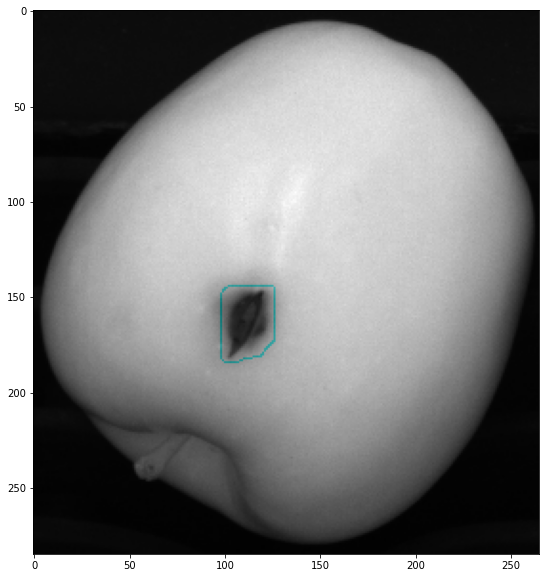

In [6]:
print('The fruit has ',holes1_task1,' defects')
plt.figure(figsize=(20,10))
plt.imshow(final1_task1,cmap="gray")
plt.show()

print('The fruit 2 has ',holes2_task1,' defects')
plt.figure(figsize=(20,10))
plt.imshow(final2_task1,cmap="gray")
plt.show()

print('The fruit 3 has ',holes3_task1,' defects')
plt.figure(figsize=(20,10))
plt.imshow(final3_task1,cmap="gray")
plt.show()

# TASK2


import libraries

In [7]:
#!/usr/local/bin/python3
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance
from numpy import var
import math
%matplotlib inline

In order to estimate the russet and also don't !!!!!! find false positive or false negative, then it is evaluated the best . I took same samples from the russet in the images given, and I used that values of russet as the target values. The function find_russet is made for evaluating the mahalanobis, distance of the pixels in the image to the pixels of the target. The colored space evaluated before choosing the HSV, are the HSL and LUV. The HSV is chosen because it allows to establish a range of contiguous values, this made a key role in the computation of the distance. Despite the possibility of adopting the 3-color space, the HSV was applied as after some trials it has proven to be the best..(?) It could be due to the difference between HSL and HSV is that a color with maximum lightness in HSL is pure white, but a color with maximum value/brightness in HSV is analogous to a shining white light on a colored object. So it has a specific range of an exact colour respect to each parameter like H(hue), S(saturation) ,V(value).

image rgb with russet pixels converted to white


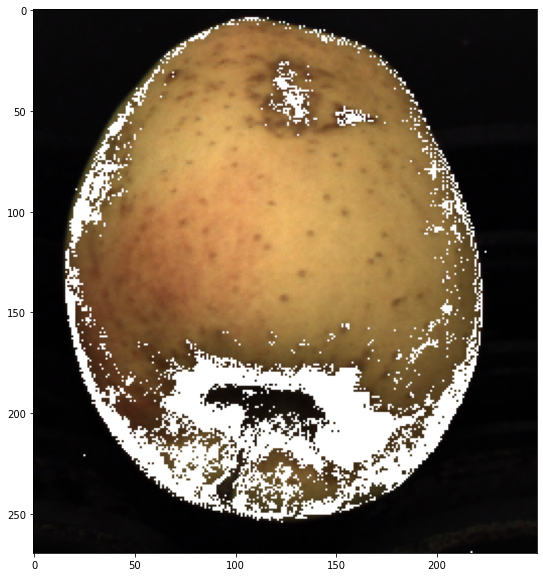

image rgb with russet pixels converted to white


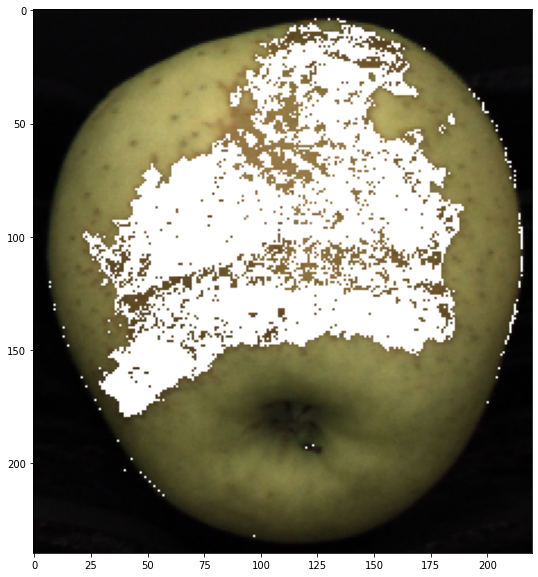

In [8]:
#upload image of task 2
img_task2_1="C1_000004.png"
img1=cv2.imread(img_task2_1)
img_task2_2="C1_000005.png"
img2=cv2.imread(img_task2_2)


## Convert to HSV img1
img_rgb1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV_FULL)

## Convert to HSV img2
img_rgb2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV_FULL)
 
def find_russet(img_rgb,img_hsv):
    """ 
        params:
            img_rgb: is the image given by the trace of the project
            img_hsv: is the image converted to hsv_full 
        output:
            img: the image with the pixel russet are converted to white
    """
    # paramer for the mahalonobis function
    iv = [[1,0.5,0.5], [0.5,1,0.5], [0.5,0.5,1]]
    list_dist=[]
    list_near_x=[]
    list_near_y=[]

    # visiting each pixel in the image
    for i in range (img_hsv.shape[0]):
        for j in range (img_hsv.shape[1]): 
            
            
            # the hue of the color russet is between 10 and 30 , so the mahalanobis distance is computed only for the values that could be russet
            # this improves the computation of the distances.
            if img_hsv[i,j,0]>=10 and img_hsv[i,j,0]<=30: 

            
                #samples of russet of picture 04 , pick by the image and converted from rgb to hsv
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[46,26,9]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[32,17,6]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[53,31,10]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[37,25,10]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[51,25,13]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[99,64,34]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[94,62,35]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[11,6,2]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[30,17,6]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[28,13,6]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[14,9,4]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))

                
                #samples of russet of picture 04 , pick by the image and converted from rgb to hsv
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[56,41,16]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[60,43,16]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[84,65,30]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[124,97,53]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[135,104,56]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[145,116,63]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[140,114,62]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
                list_dist.append(distance.mahalanobis(  cv2.cvtColor(np.uint8([[[128,105,53]]]),cv2.COLOR_RGB2HSV_FULL) , [ img_hsv[i,j,0], img_hsv[i,j,1], img_hsv[i,j,2] ],iv ))
            
            #in the list_near there are only the indexes of x and y that are nearest than 50, so 50 is the thereshold of the mahalanobis distance to get pixel russet or not.
            if  len(list_dist)!=0 and min(list_dist)<=50 :
                
                list_near_x.append(i)
                list_near_y.append(j)
                
            list_dist=[]   
            

    #pixels russet are set to white, in order to differentiate them from the rest of the pixels image.
    for i in range (len(list_near_x)):
        
        img_rgb[list_near_x[i],list_near_y[i],0]=255
        img_rgb[list_near_x[i],list_near_y[i],1]=255
        img_rgb[list_near_x[i],list_near_y[i],2]=255
    #plot the output image
    print('image rgb with russet pixels converted to white')
    plt.figure(figsize=(20,10))
    plt.imshow(img_rgb)
    plt.show()
    return img_rgb

fin_task2_1=find_russet(img_rgb1,img_hsv1)
fin_task2_2=find_russet(img_rgb2,img_hsv2)



img0


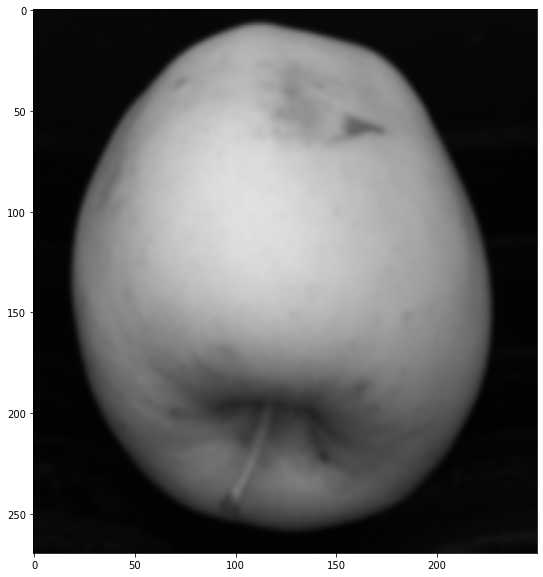

img1


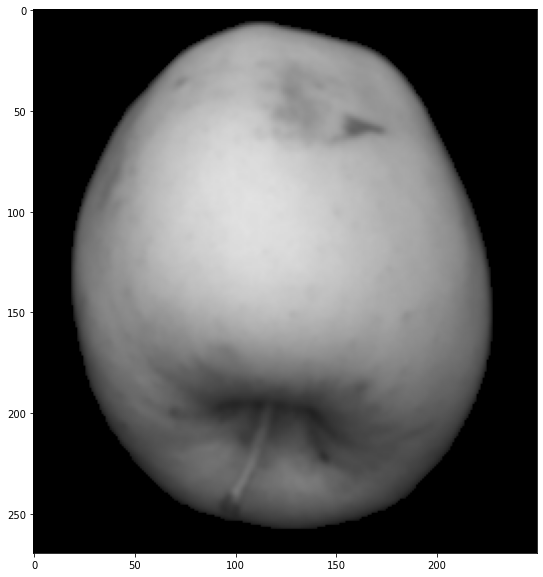

mask_2


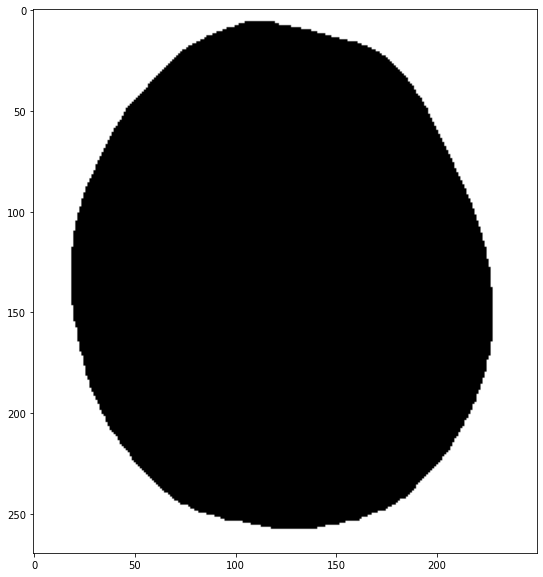

application of the mask


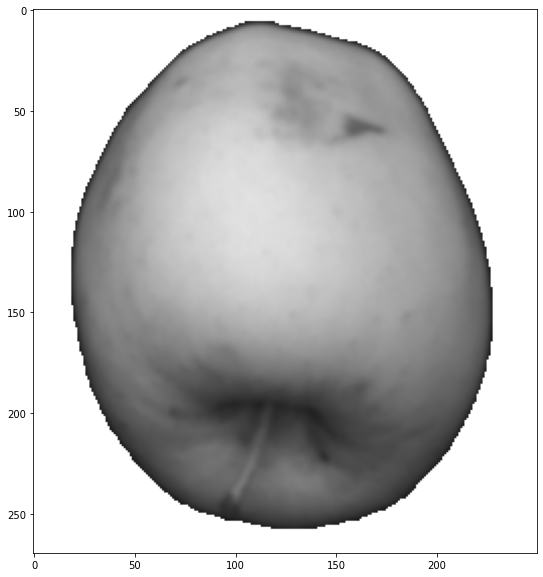

img0


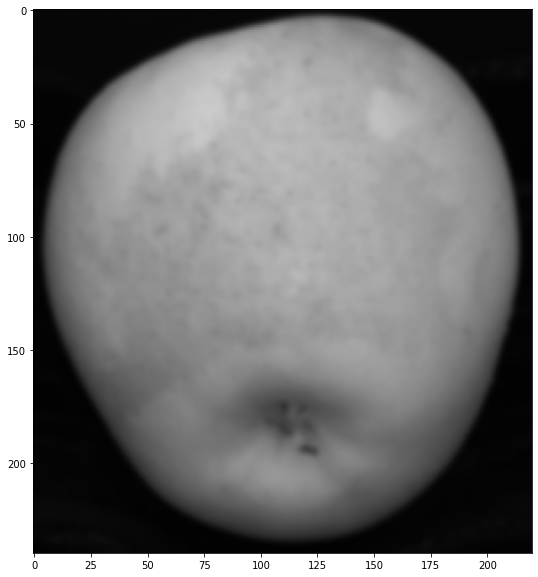

img1


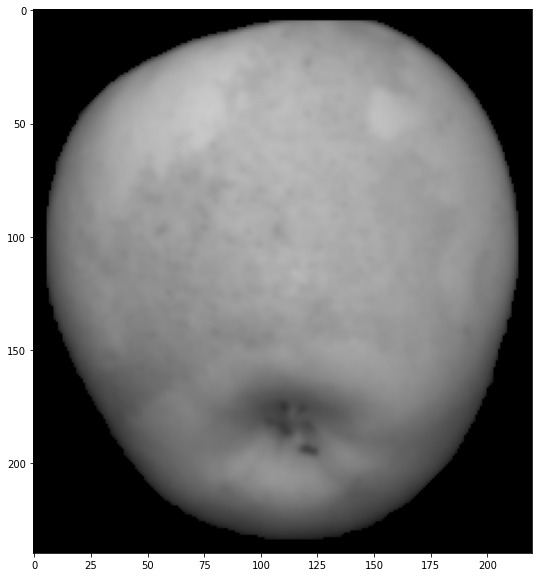

mask_2


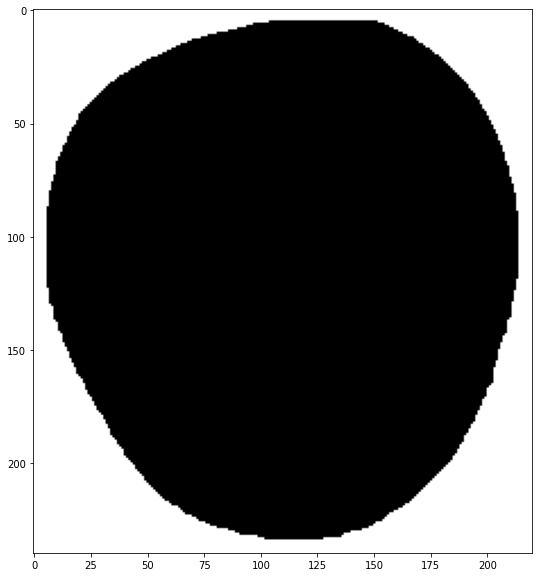

application of the mask


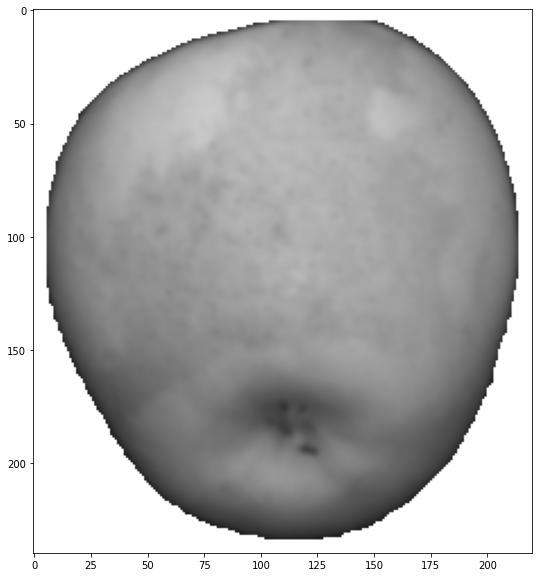

In [9]:
img_task2_1="C0_000004.png"
img_task2_2="C0_000005.png"

imgcol_task2_1="C1_000004.png"
imgcol_task2_2="C1_000005.png"



img_gray_task2_1=cv2.imread(img_task2_1)
img_col_task2_1=cv2.imread(imgcol_task2_1,cv2.IMREAD_COLOR)
img_col_task2_1=cv2.cvtColor(img_col_task2_1, cv2.COLOR_BGR2RGB)


img_gray_task2_2=cv2.imread(img_task2_2)
img_col_task2_2=cv2.imread(imgcol_task2_2,cv2.IMREAD_COLOR)
img_col_task2_2=cv2.cvtColor(img_col_task2_2, cv2.COLOR_BGR2RGB)

mask_1_task2,img_task2_1=mask_segmentation(img_gray_task2_1)
mask_2_task2,img_task2_2=mask_segmentation(img_gray_task2_2)







The function resize is made due of the recognising the russet. The russet is falsely recognised along the border of the foreground object, it is made due of the shape of the objects and the light reflected by them.
In order to recognise the right russet, in the function resize_image, is created a binary mask (of foreground) recuded in the dimensions of the foreground object, this is helpful because the russet is assumed to be inside the contour of the object and not along the border. Because a fruit as also other objects in the reality has 3 dimensions, it is needed more than a camera to analyse rightly the fruit, assumed this, is then possible to get rid of the border.


mask


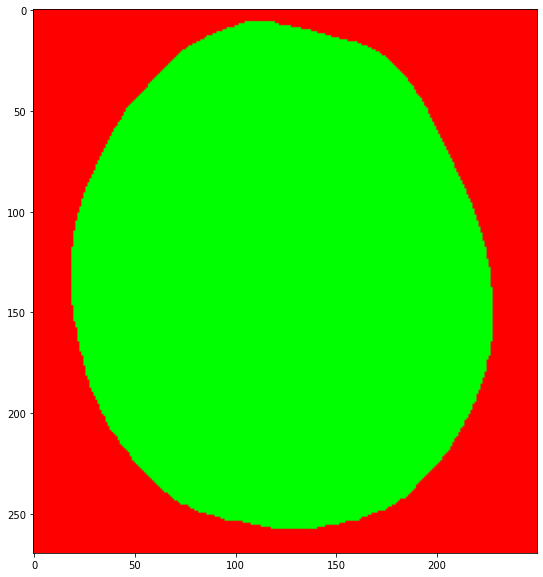

resized and interpolated


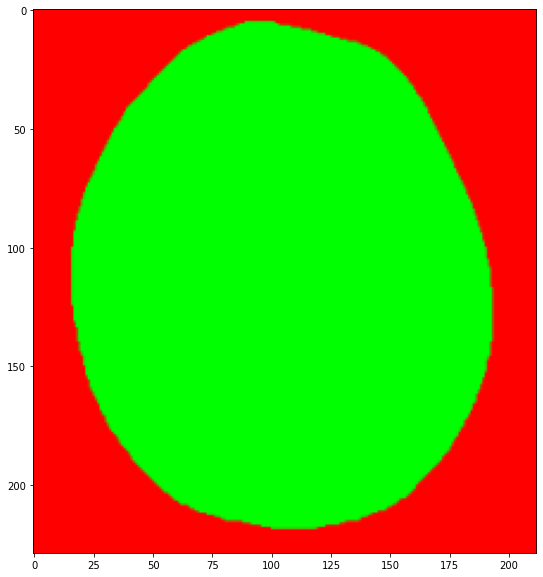

2
mask_reduced


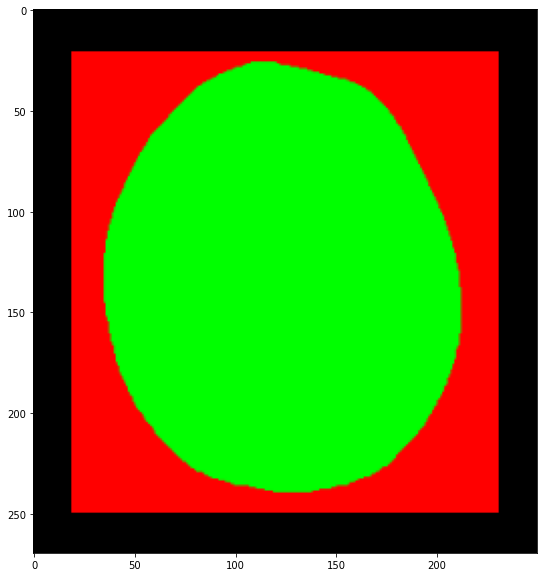

[  0 255   0]
mask reduced after removing background 
(270, 250, 3)


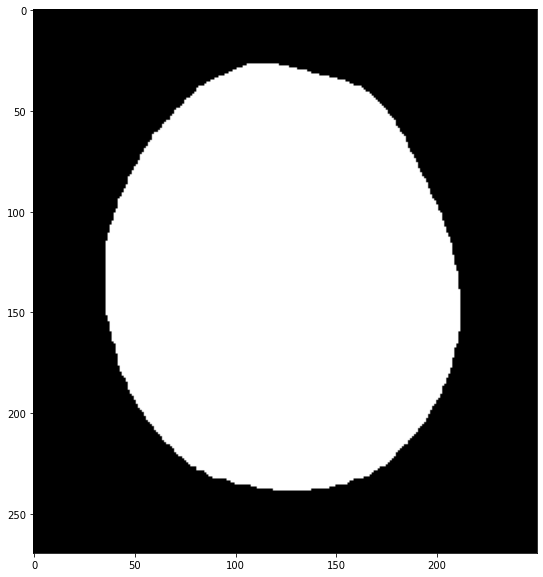

mask


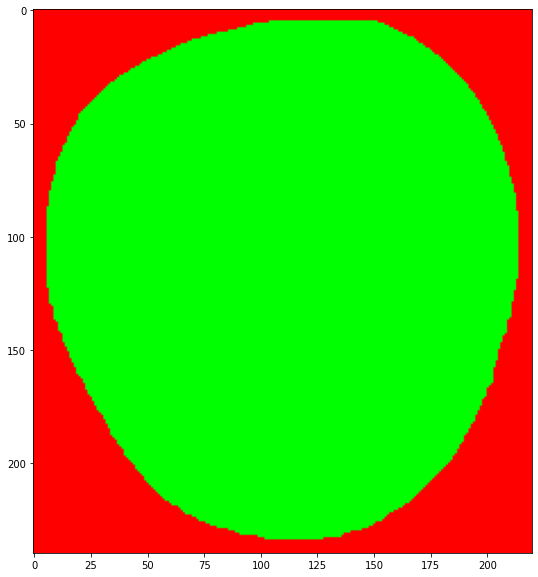

resized and interpolated


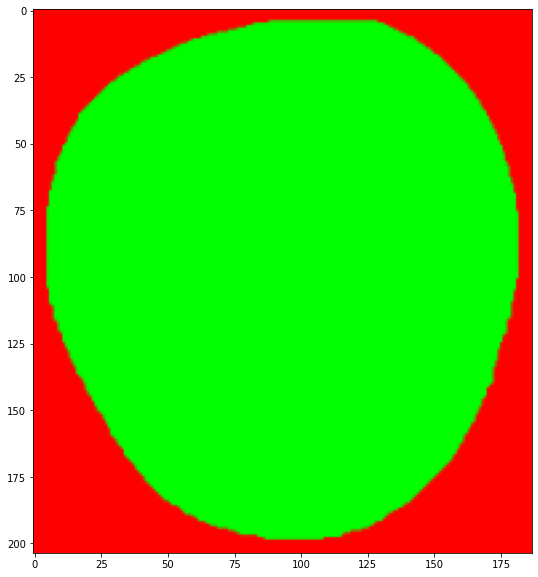

3
mask_reduced


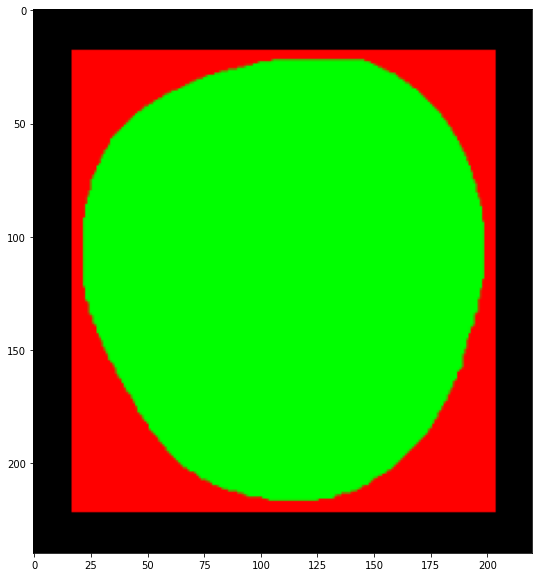

[  0 255   0]
mask reduced after removing background 
(240, 220, 3)


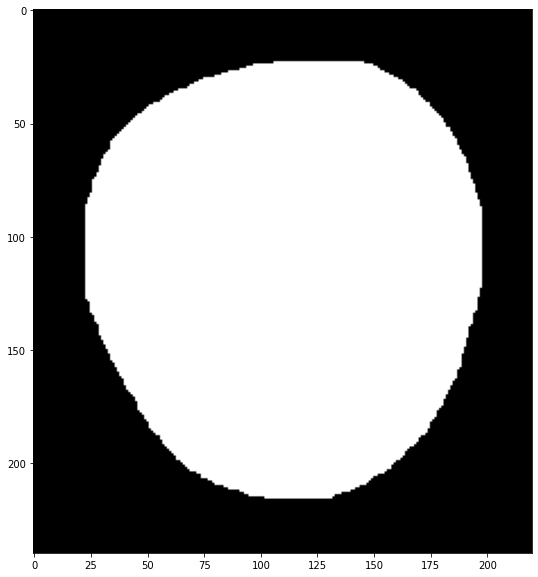

In [10]:
def resize_image(mask):
    """ 
        params: 
            mask : (it is the mask computed by the previous function mask_segmentation) or just a binary mask 

        outputs:
            resized: is the image resized ( smaller than before ).
            mask: is the mask given as input
            mask_reduced: mask reduced is the mask reduced in order to get the resized
    """
    mask[np.where((mask ==[0,0,0]).all(axis = 2))] = [0,255,0] #removing background

    mask[np.where((mask > [0,0,0]).all(axis = 2))] = [255,0,0] #removing background

    #plot of the mask (input)
    print('mask')
    plt.figure(figsize=(20,10))
    plt.imshow(mask,cmap="gray")
    plt.show()

    scale_percent = 85 # percent of original size
    width = int(mask.shape[1] * scale_percent / 100)
    height = int(mask.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
    
    
    print('resized and interpolated')
    plt.figure(figsize=(20,10))
    plt.imshow(resized,cmap="gray")
    plt.show()
    
    #reduction of the mask keeping it centred respect the center of the image.
    if (mask.shape[0]-resized.shape[0])%2==0 and (mask.shape[1]-resized.shape[1])%2==0 :
        print(1)
        mask_reduced = cv2.copyMakeBorder(resized, int((mask.shape[0]-resized.shape[0])/2)-2, int((mask.shape[0]-resized.shape[0])/2)-2, int((mask.shape[1]-resized.shape[1])/2)-2,int((mask.shape[1]-resized.shape[1])/2)-2, cv2.BORDER_CONSTANT)
    if (mask.shape[0]-resized.shape[0])%2!=0 and (mask.shape[1]-resized.shape[1])%2==0 :
        print(2)
        top=(mask.shape[0]-resized.shape[0])+1
        down=(mask.shape[0]-resized.shape[0])-1
        mask_reduced = cv2.copyMakeBorder(resized, int(top/2),int(down/2), int((mask.shape[1]-resized.shape[1])/2),int((mask.shape[1]-resized.shape[1])/2), cv2.BORDER_CONSTANT)
    if (mask.shape[0]-resized.shape[0])%2==0 and (mask.shape[1]-resized.shape[1])%2!=0 :
        print(3)
        right=(mask.shape[0]-resized.shape[0])+1
        left=(mask.shape[0]-resized.shape[0])-1
        mask_reduced = cv2.copyMakeBorder(resized, int((mask.shape[0]-resized.shape[0])/2), int((mask.shape[0]-resized.shape[0])/2), int(right/2)-1,int(left/2)-1, cv2.BORDER_CONSTANT)
    if (mask.shape[0]-resized.shape[0])%2!=0 and (mask.shape[1]-resized.shape[1])%2!=0 :
        top=(mask.shape[0]-resized.shape[0])+1
        down=(mask.shape[0]-resized.shape[0])-1
        right=(mask.shape[0]-resized.shape[0])+1
        left=(mask.shape[0]-resized.shape[0])-1
        print(top,down,right,left)
        mask_reduced = cv2.copyMakeBorder(resized, int(top/2),int(down/2),int(right/2),int(left/2), cv2.BORDER_CONSTANT)


    
    #plot of the mask_reduced
    print('mask_reduced')
    plt.figure(figsize=(20,10))
    plt.imshow(mask_reduced,cmap="gray")
    plt.show()
    print(mask_reduced[125,150,:])
    
    #binarization of the mask reduced 
    mask_reduced[np.where((mask_reduced == [255,0,0]).all(axis = 2))] = [0,0,0] 
    mask_reduced[np.where((mask_reduced >= [0,255,0]).all(axis = 2))] = [255,255,255] 
    mask_reduced[np.where((mask_reduced < [255,255,255]).all(axis = 2))] = [0,0,0] 

    print('mask reduced after removing background ')
    print(mask_reduced.shape)
    plt.figure(figsize=(20,10))
    plt.imshow(mask_reduced,cmap="gray")
    plt.show()

    
    return resized,mask,mask_reduced
resized_1,img_1_task2,img_border1=resize_image(mask_1_task2)
resized_2,img_2_task2,img_border2=resize_image(mask_2_task2)



binarizing the russet recognized ( without application of the mask_reduced) 

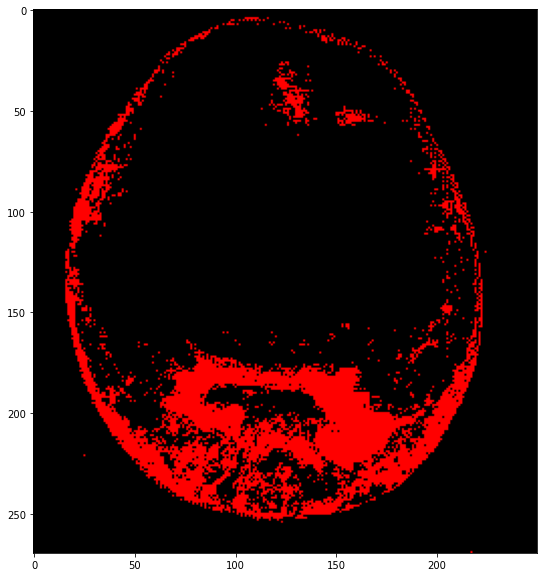

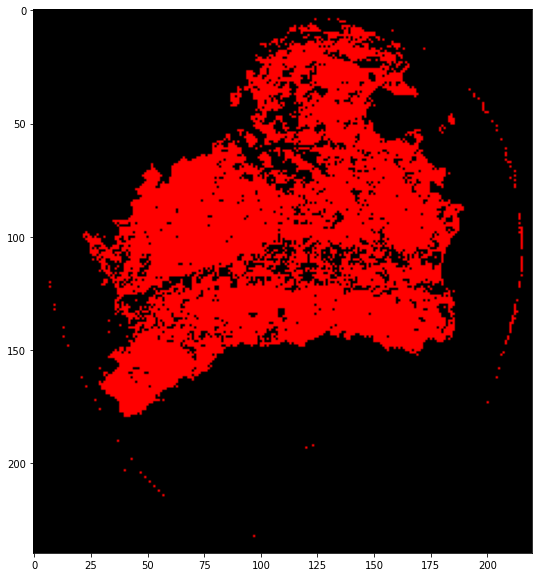

In [11]:
fin_task2_1[np.where((fin_task2_1 != [255,255,255]).all(axis = 2))] = [0,0,0] #removing background
fin_task2_1[np.where((fin_task2_1 == [255,255,255]).all(axis = 2))] = [255,0,0] #removing background


plt.figure(figsize=(20,10))
plt.imshow(fin_task2_1,cmap="gray")

plt.show()

fin_task2_2[np.where((fin_task2_2 != [255,255,255]).all(axis = 2))] = [0,0,0] #removing background
fin_task2_2[np.where((fin_task2_2 == [255,255,255]).all(axis = 2))] = [255,0,0] #removing background


plt.figure(figsize=(20,10))
plt.imshow(fin_task2_2,cmap="gray")

plt.show()


The function fill_russett has the objective to take the image that contains the pixel that are russet (binarized before), and apply the mask reduced computed by the function resize_image.
Then, the image will have as background all pixel black, in the foreground the pixel white and the russet is colored blue, transforming the white pixels to black, the result will be that only russet is colored, the rest of the image is black.
Using the floodfill approach the pixels russet will be signed of the photo like homogenous regions and not like pixel (dot).
The floodfill is followed by the theresholding to get an image where are visible all the contours, and then binarized properly by taking into account the values of the pixels. 
By the binarized image is then retrieved the contours of the defects by canny function, these contours are then applied on the starter image of the task.

img_test


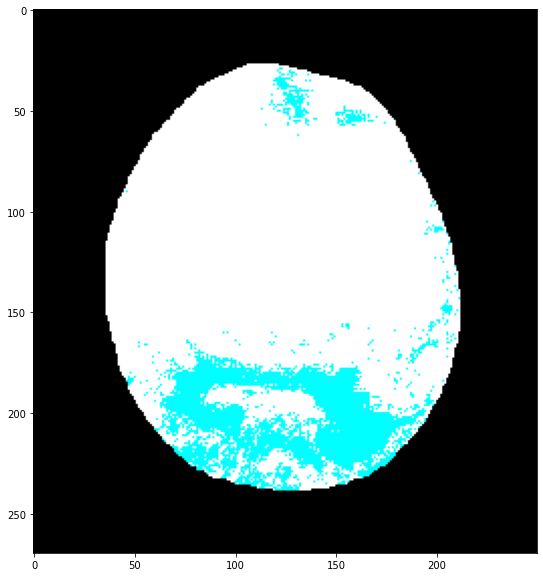

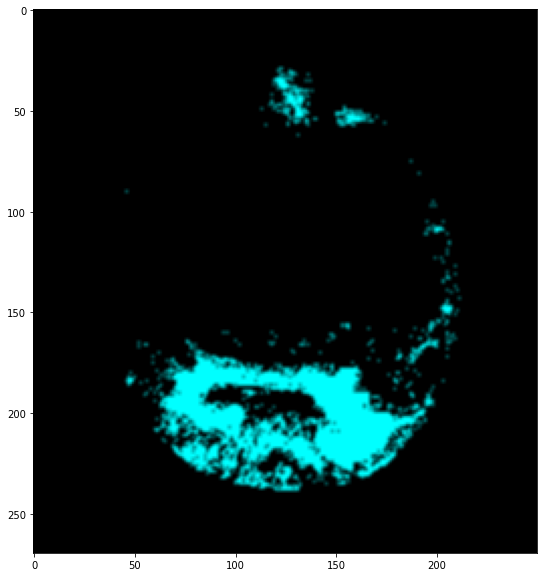

close img


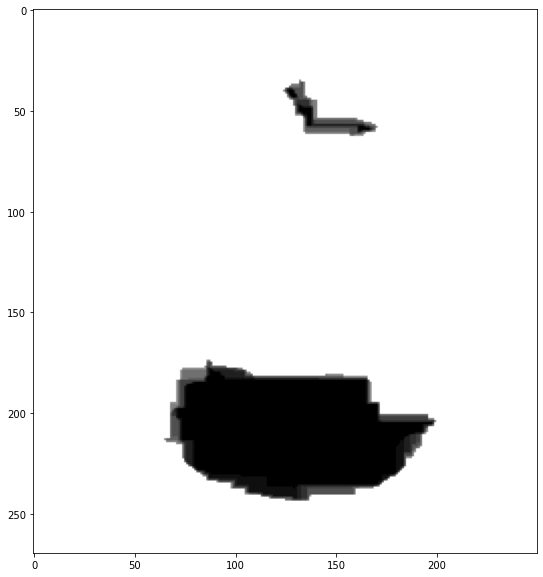

edged russet


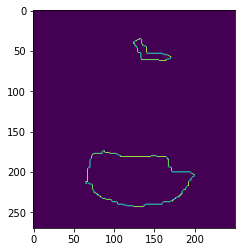

Number of russet areas: 2


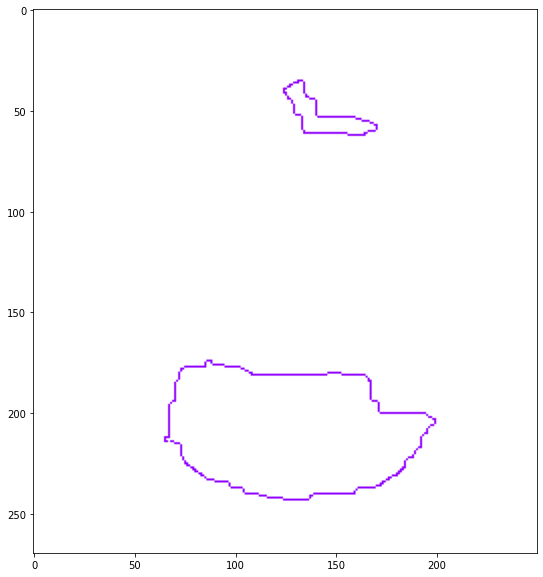

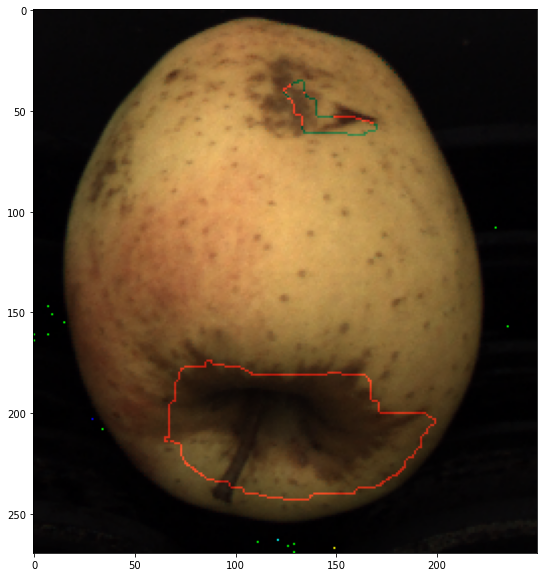

img_test


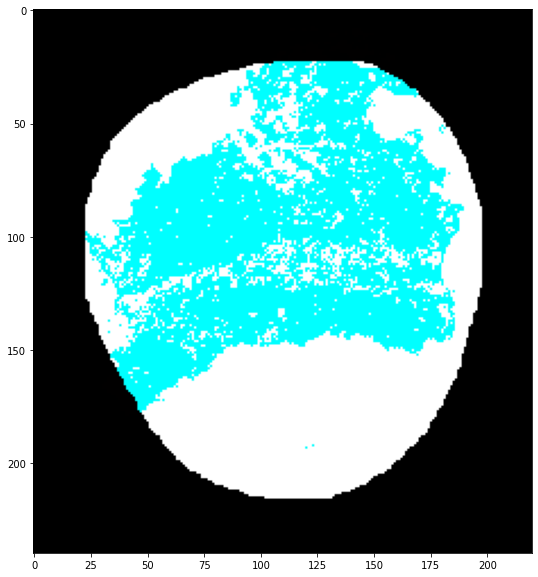

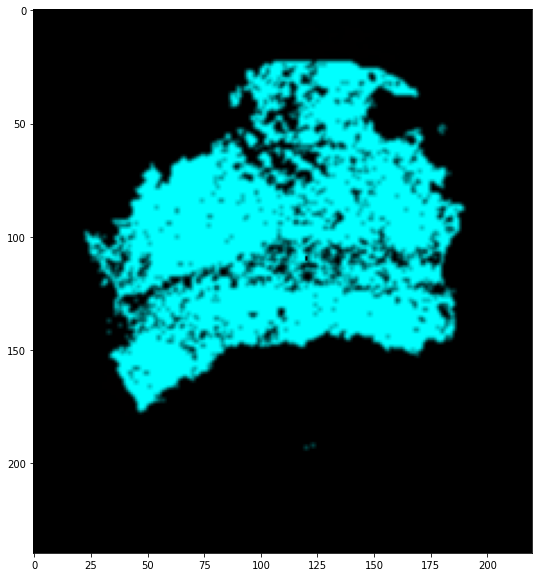

close img


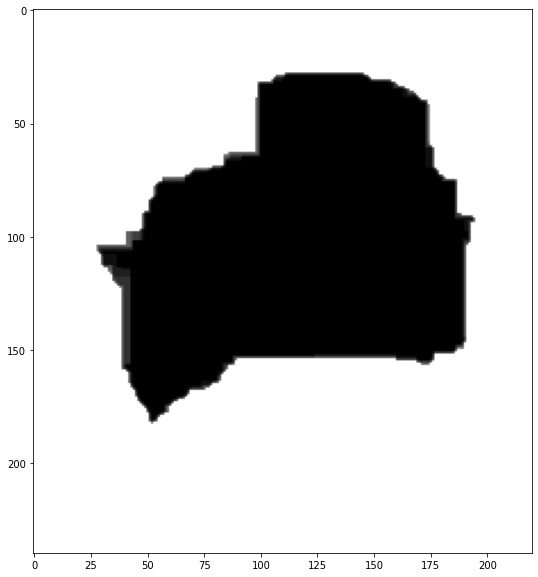

edged russet


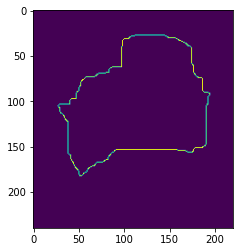

Number of russet areas: 1


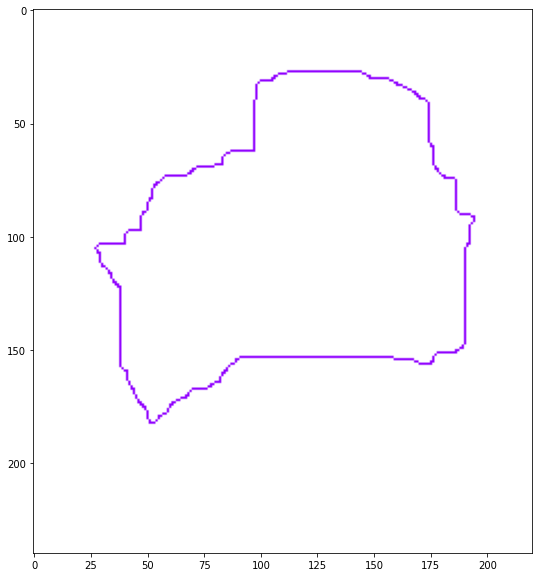

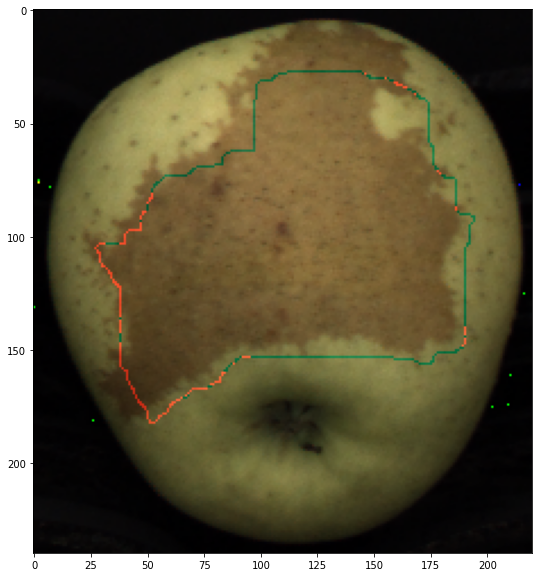

In [12]:
def fill_russet(img,name_photo,mask):
    """ 
        params:
            img :  is the russet binarized
            name_photo: is the name of the starter image ( given by the task)
            mask: is the mask reduced

        outputs:
            final_test1: is the image of name_photo with the defects circled.        
    """
    #application of the mask
    img_test=mask-img 
    print('img_test')
    plt.figure(figsize=(20,10))
    plt.imshow(img_test,cmap="gray")
    plt.show()

    
    img_test_2=np.copy(img_test)
    img_test_2[np.where((img_test_2 == [255,255,255]).all(axis = 2))] = [0,0,0] #inverting the background

    img_test_3 = cv2.GaussianBlur(img_test_2, (3,3),0)


    fin1=np.copy(img_test_3)

    #param of the floodFill function 
    seed=(int(fin1.shape[0]/2),int(fin1.shape[1]/2))

    fin1=cv2.floodFill(fin1,None,seedPoint=seed, newVal=(255,255,255),loDiff=(13,13,13), upDiff=(15,15,15))[1]
    fin1[np.where((fin1 == [255,255,255]).all(axis = 2))] = [0,0,0] #removing background

    #plot of the floodFilled russet pixels
    plt.figure(figsize=(20,10))
    plt.imshow(fin1)
    plt.show()

    #conversion of the fin1 from bgr to grayscale to apply the theresholding in order to retrieve the contours by using the function findContours
    gray = cv2.cvtColor(fin1, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255,  cv2.THRESH_TOZERO+ cv2.THRESH_OTSU)[1]

    # Filter using contour area and remove small noise
    cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # draw of the contours(russet areas)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 50:
            cv2.drawContours(thresh, [c], -1, (0,0,0), -1)


    # Morph close and invert image, to best approximation of the russet
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
    close =  cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)




    #plot of the close
    print('close img')
    plt.figure(figsize=(20,10))
    plt.imshow(close,cmap=plt.cm.binary)
    plt.show()



    #uniforming the black of the russet areas
    close[np.where((close != [0]))] = [255]
    edged = cv2.Canny(close, 30, 200)
    contours, hierarchy = cv2.findContours(edged, 
        cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    #plot of the edges found
    print('edged russet')
    plt.imshow(edged) 
    plt.show()
    #euler number- hole number
    counter_russet_areas=len(contours[::-1])-1
    print('Number of russet areas:', counter_russet_areas)

      
    #inverting color in the image
    img_lines=255-edged
    #create image by multiplying for each channel
    img_lines = np.stack((img_lines,)*3, axis=-1)

    #changing colors
    img_lines[np.where((img_lines > [0,0,0]).all(axis = 2))] = [255,255,255] #removing background
    img_lines[np.where((img_lines==[0,0,0]).all(axis=2))]=[144,0,255]

    #img_lines
    plt.figure(figsize=(20,10))
    plt.imshow(img_lines)
    plt.show()

    #reading the starter image of the task(BGR image)
    img=cv2.imread(name_photo)################

    ## Convert image
    img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_test_1 = abs(img_rgb+img_lines)

    plt.figure(figsize=(20,10))
    plt.imshow(final_test_1)
    plt.show()
    return final_test_1,counter_russet_areas

result_task2_1,counter_russet_areas_1=fill_russet(fin_task2_1,imgcol_task2_1,img_border1)
result_task2_2,counter_russet_areas_2=fill_russet(fin_task2_2,imgcol_task2_2,img_border2)

RESULTS TASK 2

Number of russet areas found are:  2


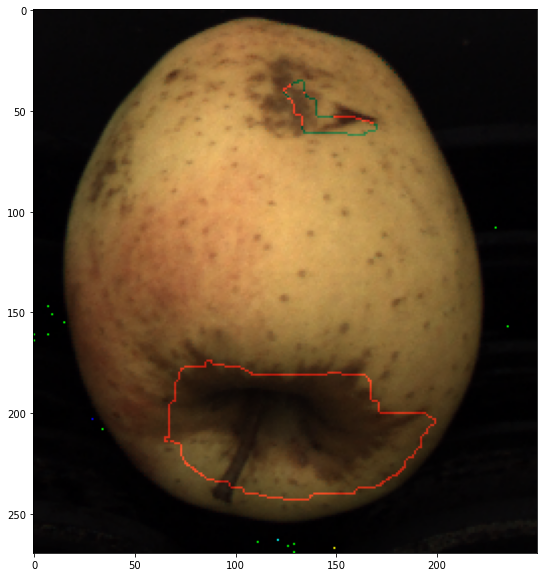

Number of russet areas found are:  1


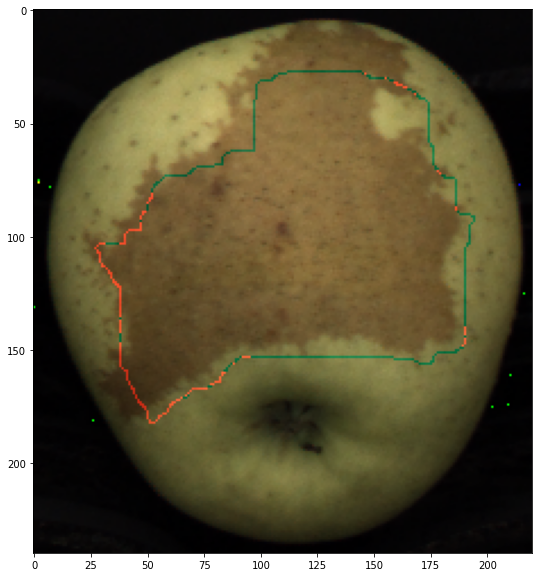

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(result_task2_1)
print('Number of russet areas found are: ',counter_russet_areas_1 )
plt.show()
plt.figure(figsize=(20,10))
print('Number of russet areas found are: ',counter_russet_areas_2 )

plt.imshow(result_task2_2)
plt.show()

TASK OPTIONAL

Import libraries

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The optional task is achieved by the application of the function grabCut that returns a mask that segment the image in foreground and background, and next binarized. Then the mask is applied on the starter image to get the foreground pixels. Computing the substraction between the image starter and the image masked, then it is obtained the foreground( called foreground_segmented), then it is binarized. The foreground_segmented is added to the image masked , then binarized. This mask therefore obtained, is applied to the starter image. ( obtained first img_segm)
To delete the objects that should not be in the foreground but are selected as foreground, it is used a floodfill. The image flodfilled is then substracted to the foreground found at first time, and then is computed a bitwise and between the starter image of the task and the image obtained by the last computation. 
On this last image, are computed the counts of the contours, to retrieve the number of holes ( defects) in the image.

(5, 5, 215, 245)
imgo


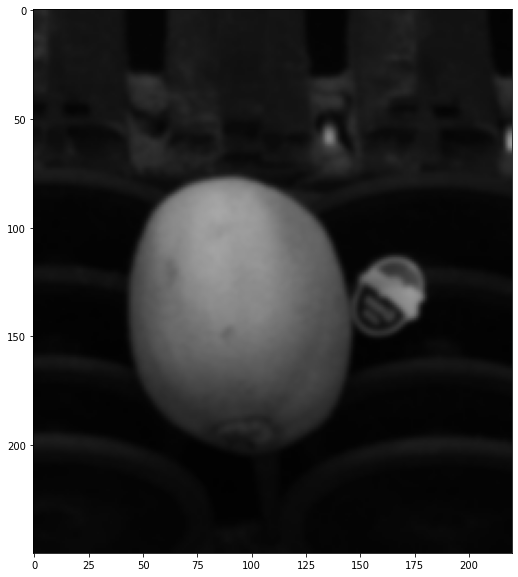

img1


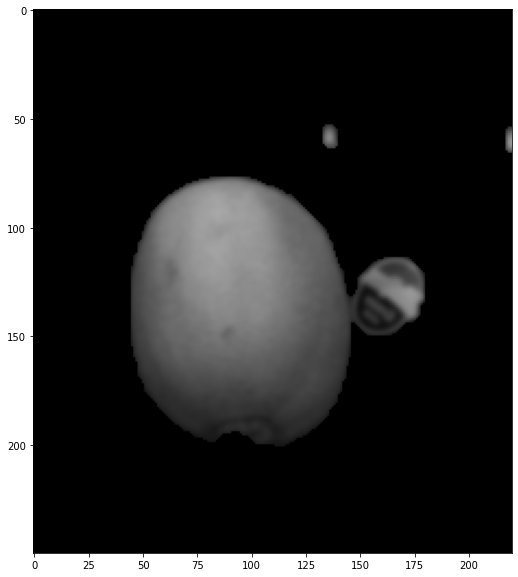

foreground_segmented


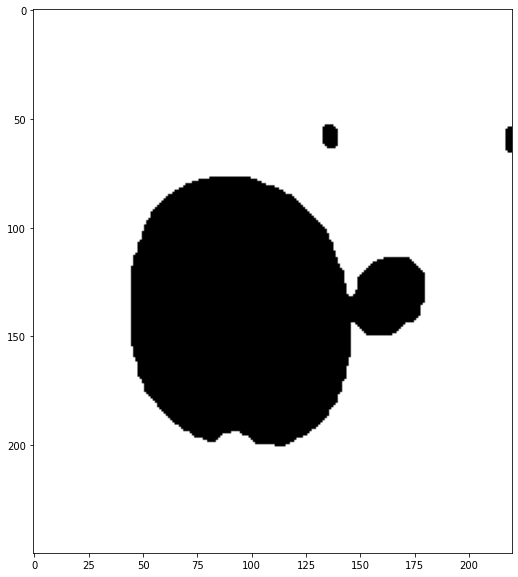

img_segm =  foreground_segmented+img1


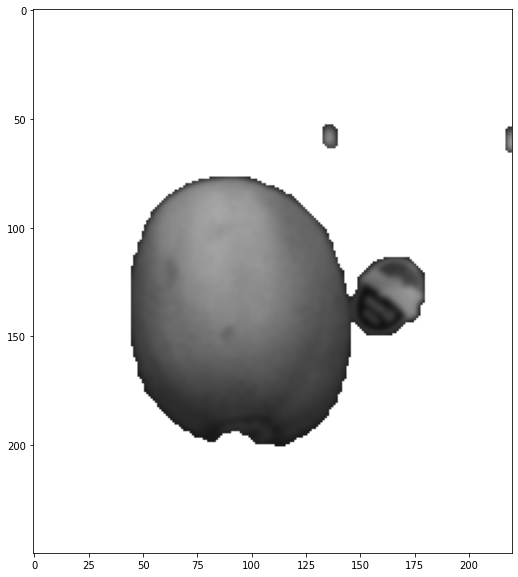

img_segm by floodfill


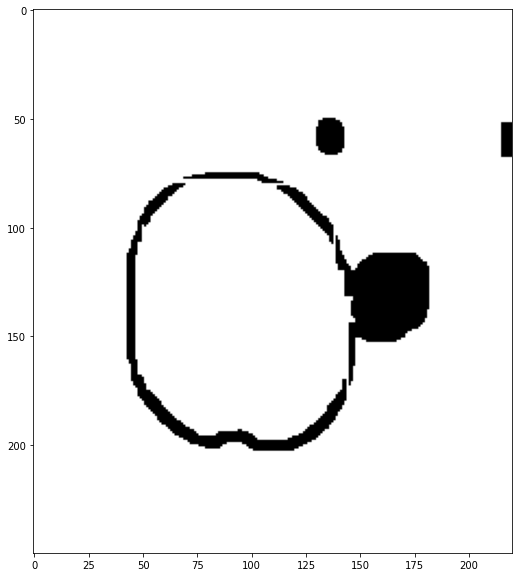

img_final


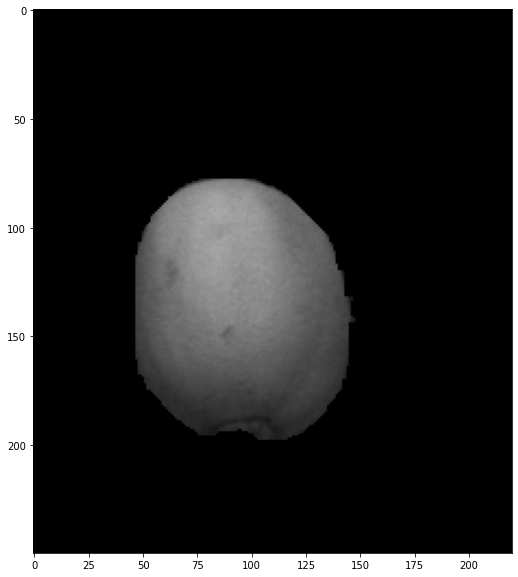

edged


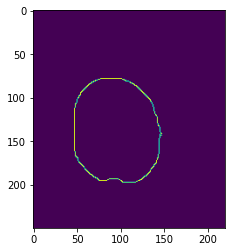

Number of defects found are : 0
img_lines


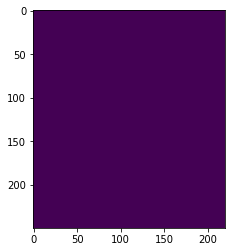

(5, 5, 215, 195)
imgo


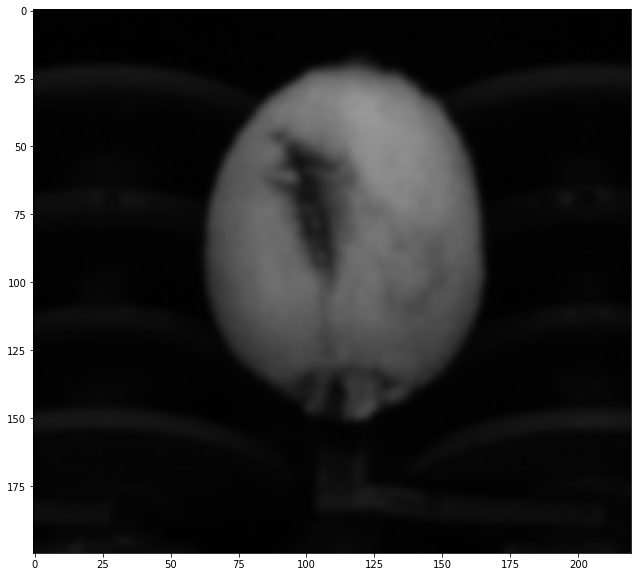

img1


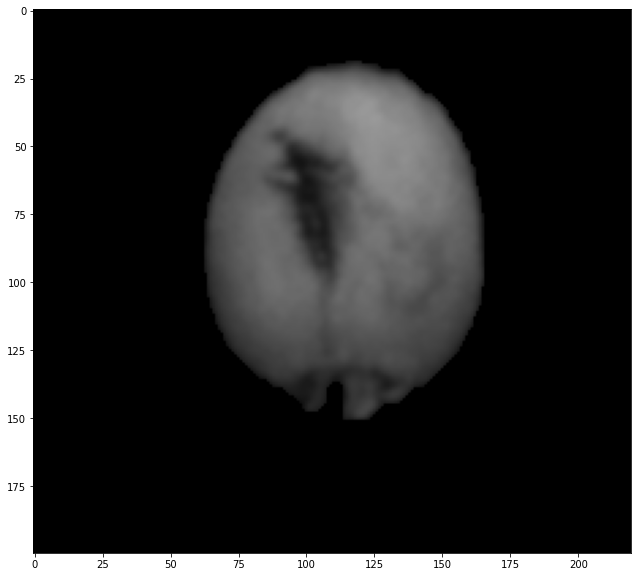

foreground_segmented


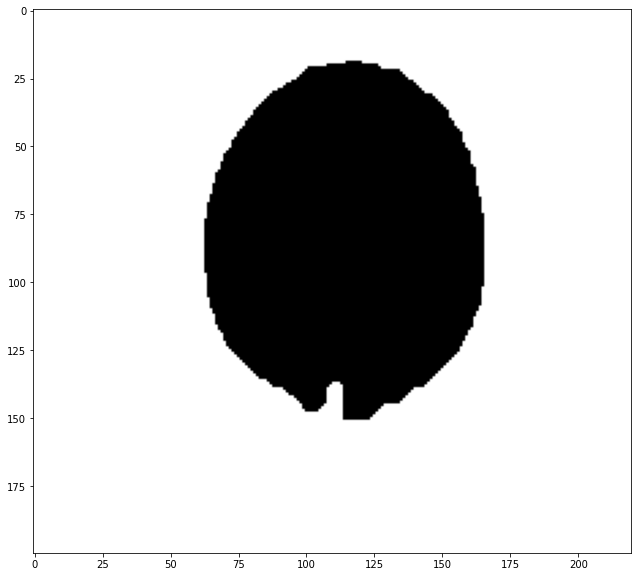

img_segm =  foreground_segmented+img1


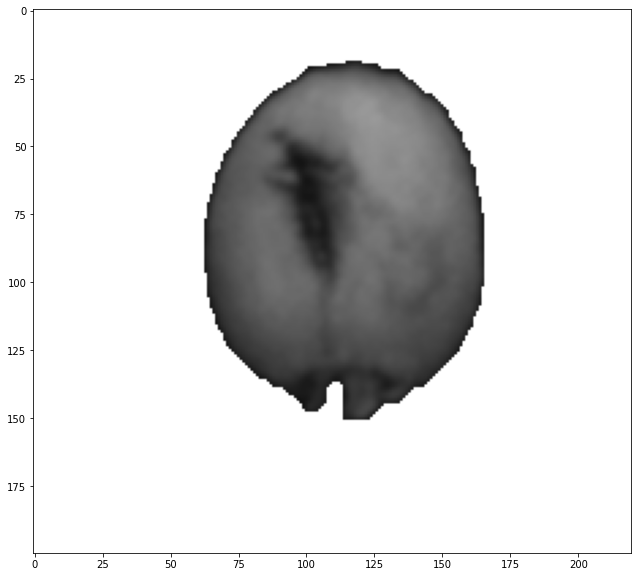

img_segm by floodfill


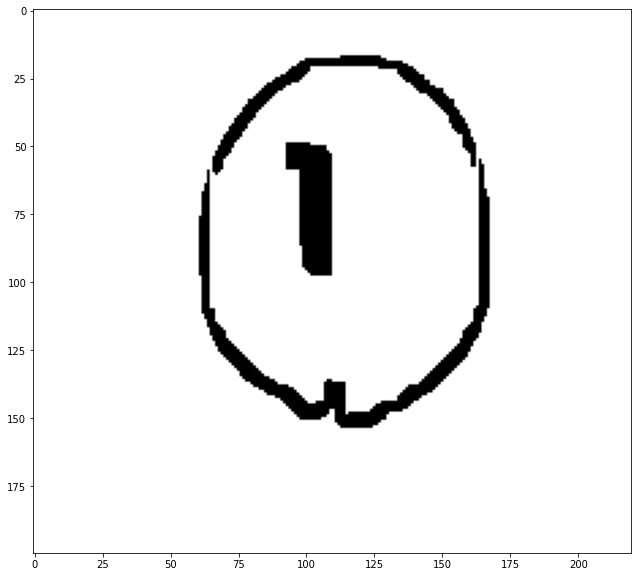

img_final


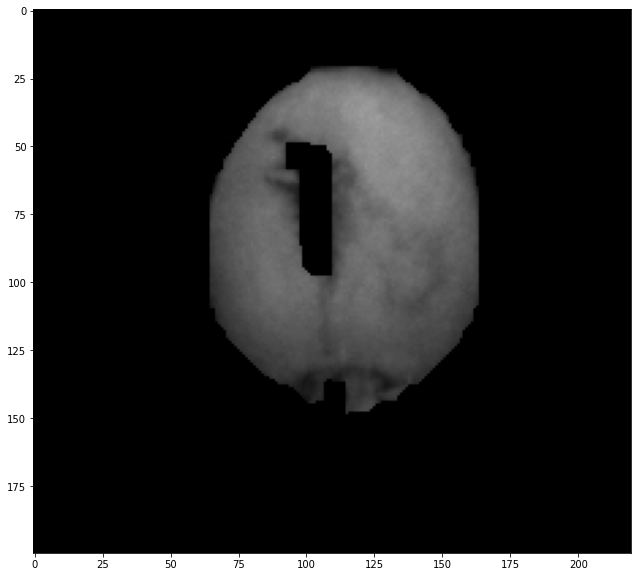

edged


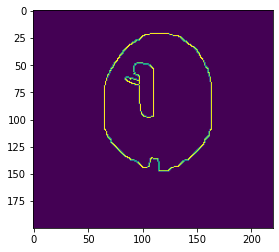

Number of defects found are : 2
img_lines


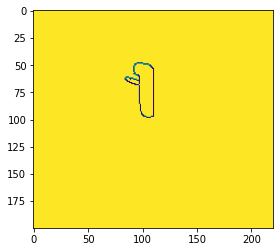

(5, 5, 215, 195)
imgo


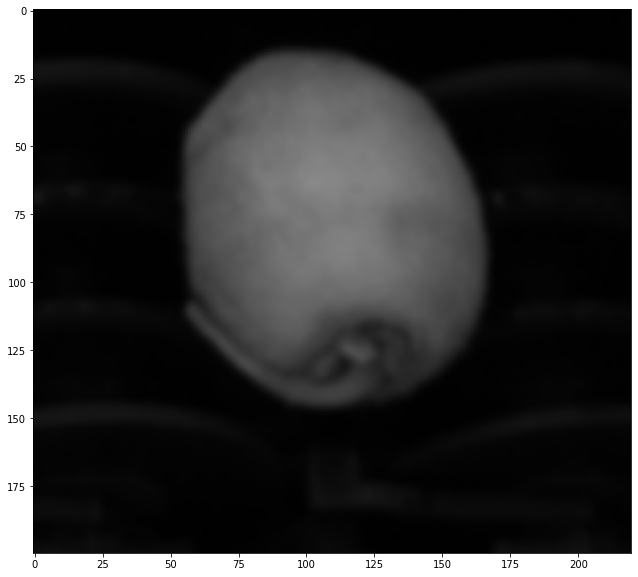

img1


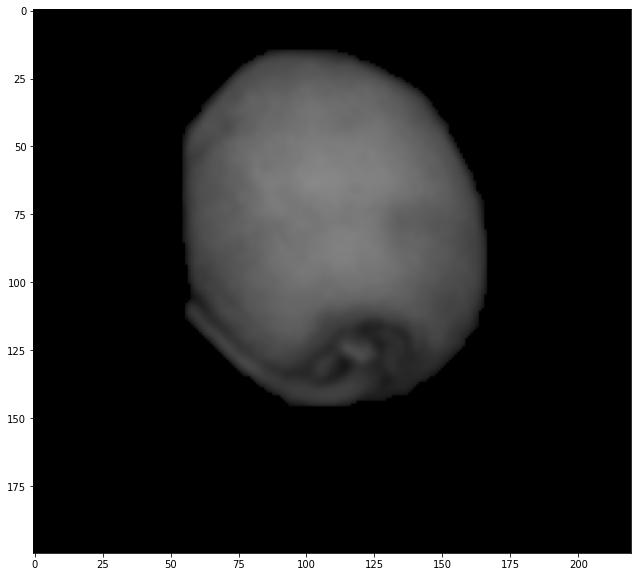

foreground_segmented


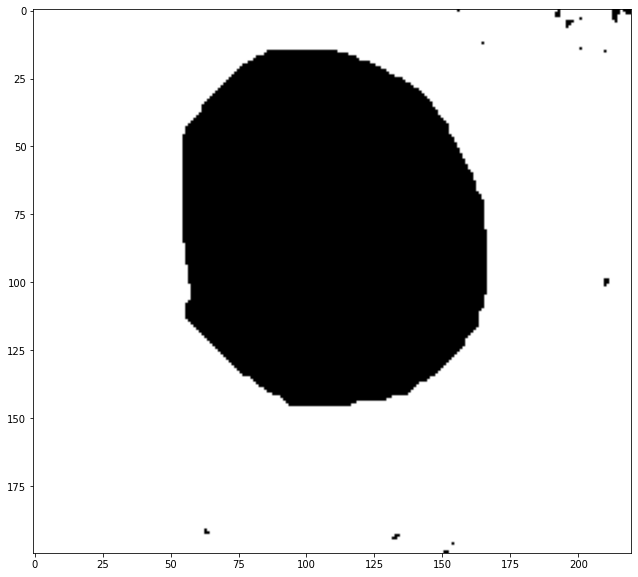

img_segm =  foreground_segmented+img1


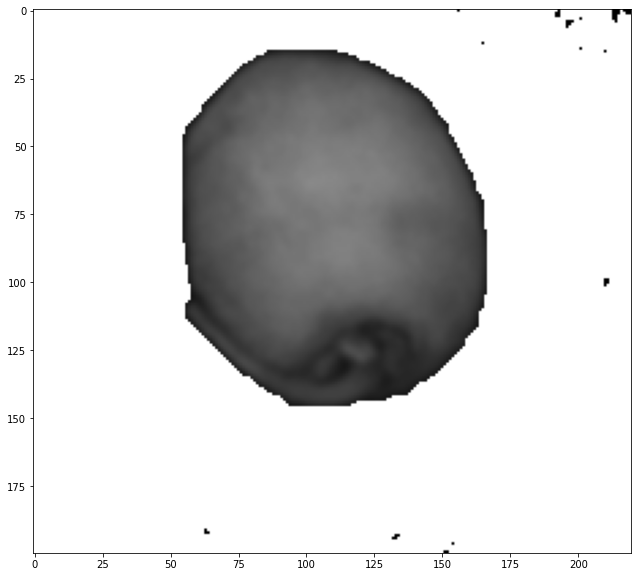

img_segm by floodfill


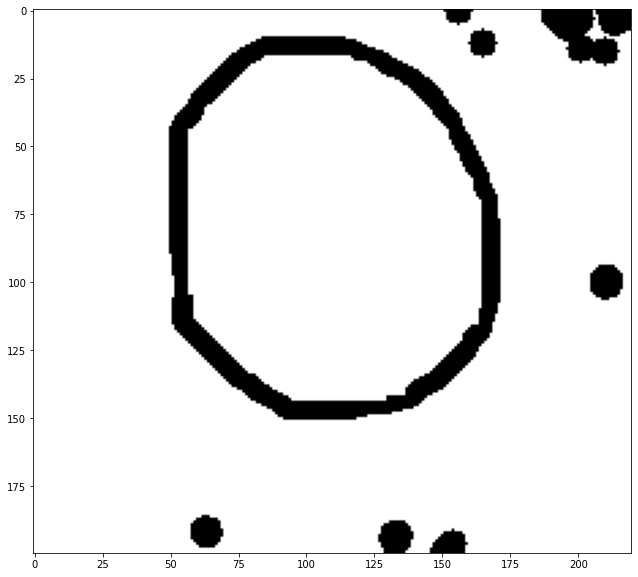

img_final


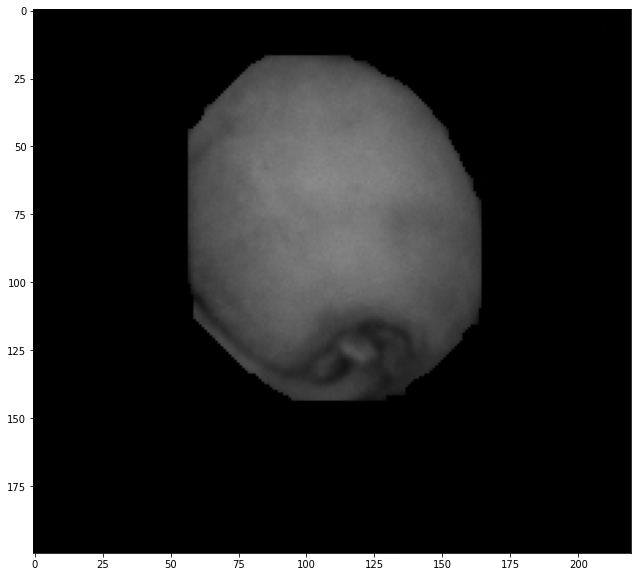

edged


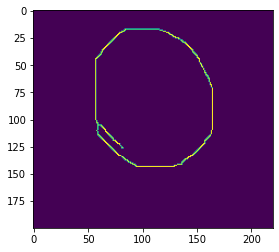

Number of defects found are : 0
img_lines


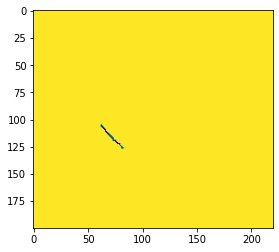

(5, 5, 215, 245)
imgo


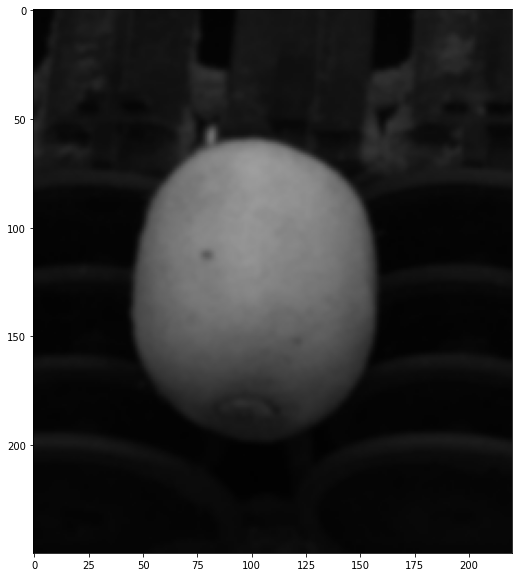

img1


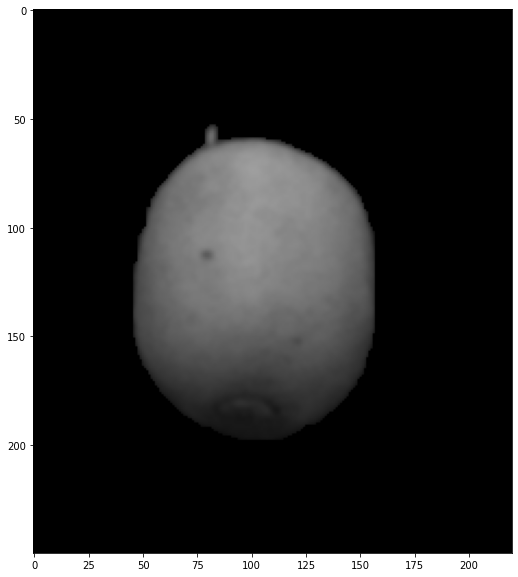

foreground_segmented


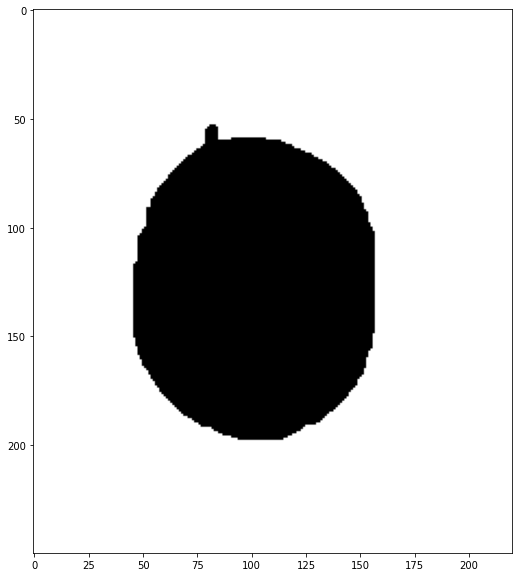

img_segm =  foreground_segmented+img1


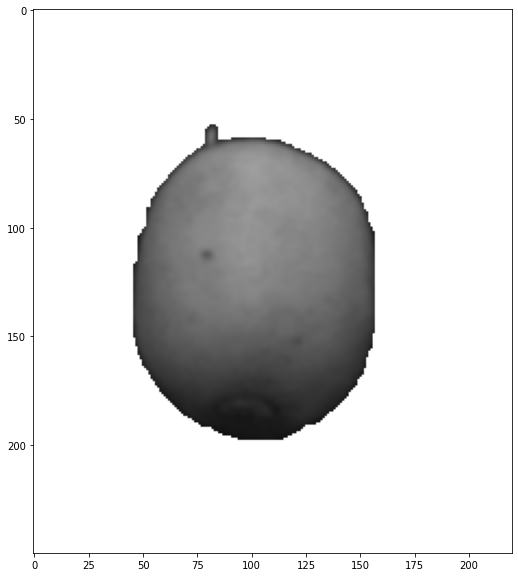

img_segm by floodfill


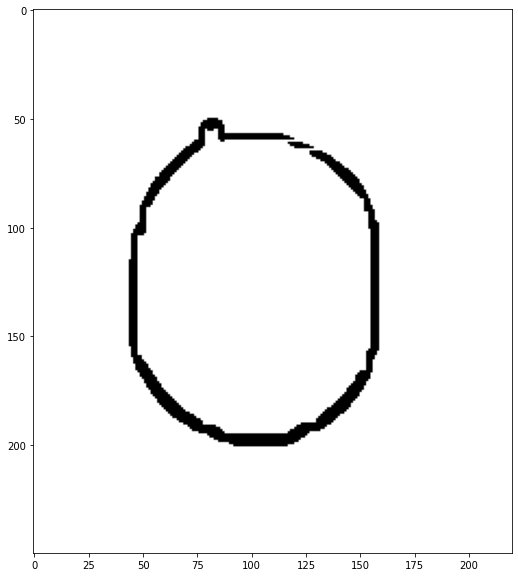

img_final


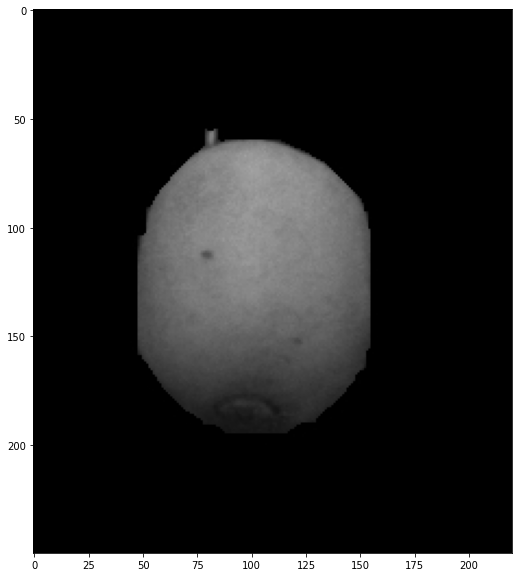

edged


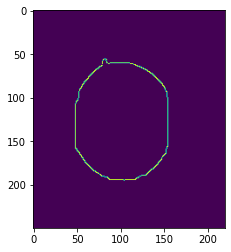

Number of defects found are : 0
img_lines


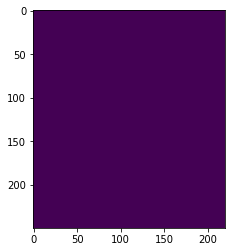

(5, 5, 215, 195)
imgo


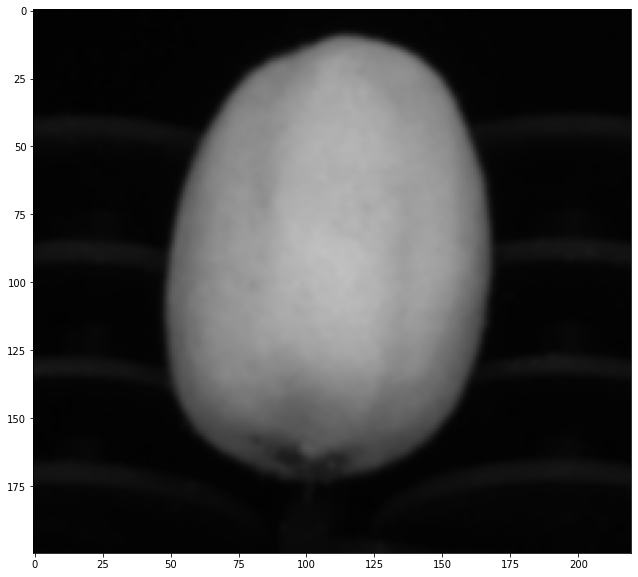

img1


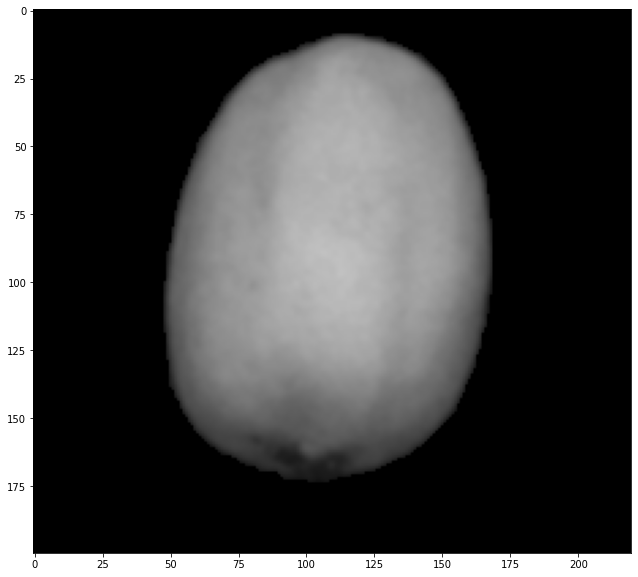

foreground_segmented


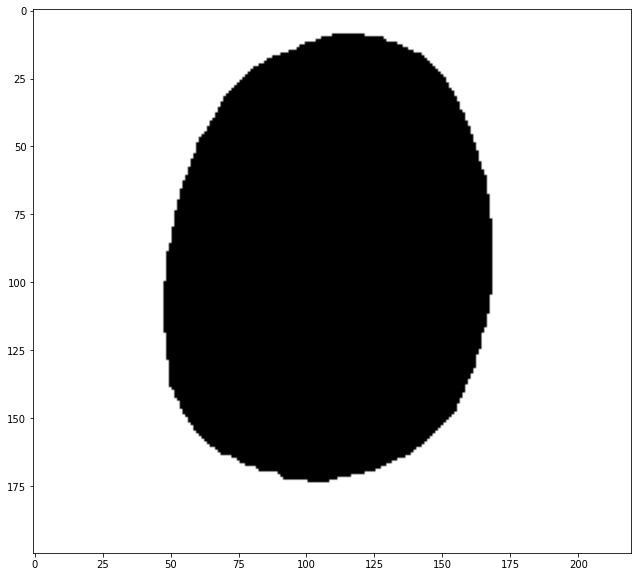

img_segm =  foreground_segmented+img1


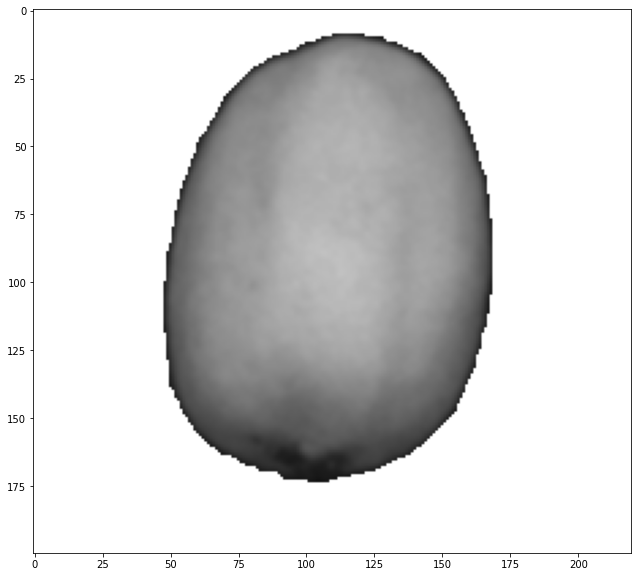

img_segm by floodfill


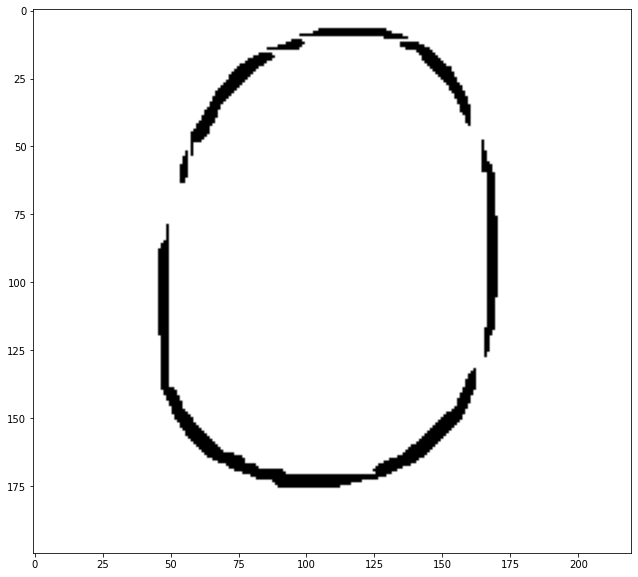

img_final


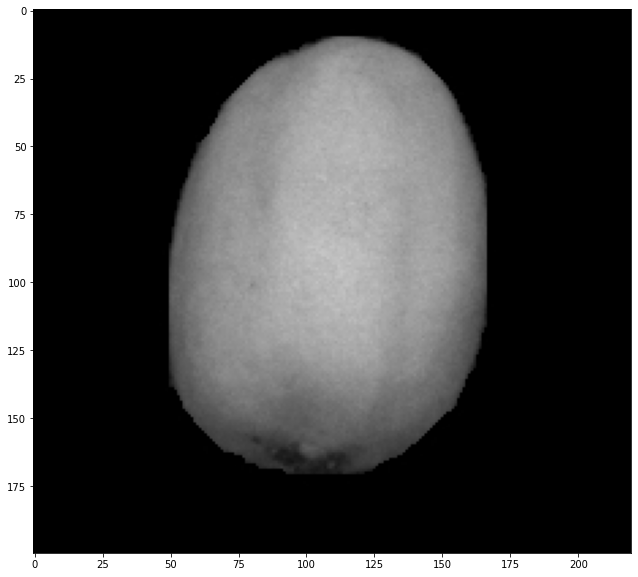

edged


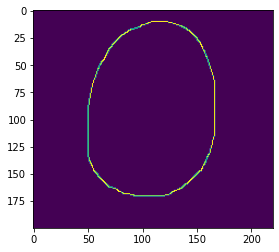

Number of defects found are : 0
img_lines


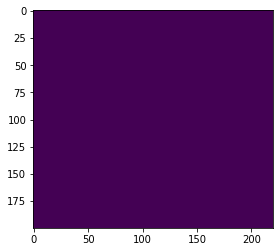

In [15]:

#filename of the pics of the task optional
pics=["C0_000006.png","C0_000007.png","C0_000008.png","C0_000009.png","C0_000010.png"]

#variables to save results
results_taks_optional=[]
list_counter_defects=[]
#this for is made in order to do elaborations on each image of this task

for name_p in pics:
    #reading image in grayscale
    img_gray=cv2.imread(name_p)
    img_gray_bin=cv2.imread(name_p,cv2.IMREAD_GRAYSCALE)
    #reading same image colored
    img_col=cv2.imread(name_p,cv2.IMREAD_COLOR)
    img_col=cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)


    #smoothing the image
    imgo = cv2.GaussianBlur(img_gray, (5,5),0)

    height, width = imgo.shape[:2]
    
    #####params of the function grabCut
    #Create a mask holder
    mask = np.zeros(imgo.shape[:2],np.uint8)
    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    #Hard Coding the Rect The object must lie within this rect.
    rect = (5,5,width-5,height-5)
    print(rect)
    
    cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
    ########

    #binarizing the mask
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    #application of the mask 
    img1 = imgo*mask[:,:,np.newaxis]

    #plot of the starter image blurred
    print('imgo')
    plt.figure(figsize=(20,10))
    plt.imshow(imgo)
    plt.show()
    
    #plot of the image masked
    print('img1')
    plt.figure(figsize=(20,10))
    plt.imshow(img1)
    plt.show()


    foreground_segmented = imgo - img1

    #Change all pixels in the background that are not black to white, the rest of them to black
    foreground_segmented[np.where((foreground_segmented > [0,0,0]).all(axis = 2))] = [255,255,255] #removing background

    #foreground_segmented
    print('foreground_segmented')
    plt.figure(figsize=(20,10))
    plt.imshow(foreground_segmented)
    plt.show()

    #Add the foreground_segmented to the image masked
    img_segm = foreground_segmented+img1
    print('img_segm =  foreground_segmented+img1')
    plt.figure(figsize=(20,10))
    plt.imshow(img_segm)
    plt.show()
    


    #smoothing 2 times the image before to apply the floodfill function, it should get better results, because smoothing the imperfectations.
    img_segm = cv2.GaussianBlur(img_segm, (3,3),0)
       
    seed=(int(img_segm.shape[0]/2),int(img_segm.shape[1]/2))
    img_segm = cv2.GaussianBlur(img_segm, (11,11),0)
    img_segm=cv2.floodFill(img_segm,None,seedPoint=seed, newVal=(255,255,255),loDiff=(3,3,3), upDiff=(11,11,11))[1]
    
    
       
    #binarizing the image floodfilled.
    img_segm[np.where((img_segm < [255,255,255]).all(axis = 2))] = [0,0,0]

    #plot of the image floodfilled
    print('img_segm by floodfill')
    plt.figure(figsize=(20,10))
    plt.imshow(img_segm)
    plt.show()


    #image floodfilled- foreground objects
    img_2=abs(img_segm-foreground_segmented)
    
    #the bitwise and has the role to keed only the objects in foreground.
    img_final=cv2.bitwise_and(img_gray,img_2)

    #plot of the final image
    print('img_final')
    plt.figure(figsize=(20,10))
    plt.imshow(img_final)
    plt.show()


    #blurred image final to apply the canny and findContours functions to get the number of holes ( defects ) present in the image, and eventually cricle them.

    img_final2 = cv2.GaussianBlur(img_final, (5,5),0)
   
    
    edged = cv2.Canny(img_final2, 30, 200)
    contours, hierarchy = cv2.findContours(edged, 
        cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    #show of the edges found
    print('edged')
    plt.imshow(edged) 
    plt.show()


    counter_defects=len(contours[::2])-1
    print('Number of defects found are :', counter_defects)
    # draw circle on the starter image
    img_sign=cv2.drawContours(edged, contours[len(contours)-1], -1, (0,255,0), 3)
    print('img_lines')
    img_lines=255-img_sign
    plt.imshow(img_lines) 
    plt.show()
    list_counter_defects.append(counter_defects)
    results_taks_optional.append(img_final)
    
    



    

RESULTS OF TASK OPTIONAL

Number of defects found is :  0


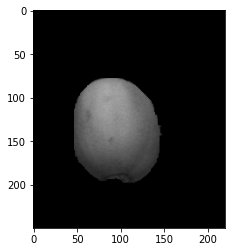

Number of defects found is :  2


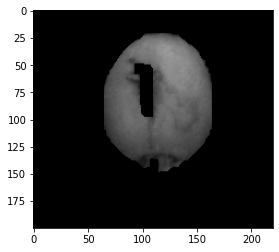

Number of defects found is :  0


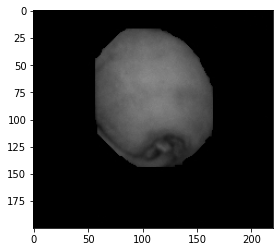

Number of defects found is :  0


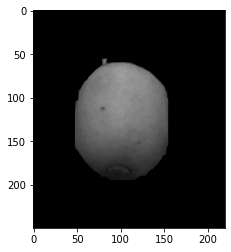

Number of defects found is :  0


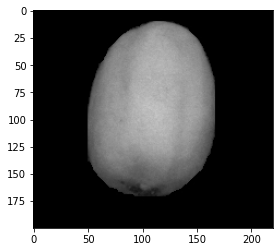

In [18]:
for i in range(5):
    print('Number of defects found is : ',list_counter_defects[i])
    plt.imshow(results_taks_optional[i]) 
    plt.show()
    